# VAE on spin systems: NNN-TFIM

### Importation

In [ ]:
import netket as nk
import jax
from netket.operator.spin import sigmax,sigmaz
from jax import numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import flax

## Creation of the dataset

### Exact diagonalization

In [ ]:
from netket.operator.spin import sigmax,sigmaz, sigmay
N = 20
hi = nk.hilbert.Spin(s=1/2, N=N)


def get_H(J1,J2,h,N=N):
    '''NNN-TFIM Hamiltonian with PBC'''

    #NN interactions
    H = sum([J1*sigmaz(hi,i)*sigmaz(hi,(i+1)%N) for i in range(N)])
    #NNN interactions
    H += sum([J2*sigmaz(hi,i)*sigmaz(hi,(i+2)%N) for i in range(N)])
    #External field
    H += sum([h*sigmax(hi,i) for i in range(N)])

    return H

In [ ]:
from netket.operator.spin import sigmax,sigmaz,sigmay

#size of the system
N = 20

#define the various observables we want to compute
corr_op = sum([sigmaz(hi,i)*sigmaz(hi,(i+1)%N) for i in range(N)])
corr2_op = sum([sigmaz(hi,i)*sigmaz(hi,(i+2)%N) for i in range(N)])
parity_op = 1
for i in range(N):
    parity_op *= sigmaz(hi,i)
magnetization_op = sum([sigmaz(hi,i) for i in range(N)])
magnetization_op *= parity_op
D_op = sum([(-1)**i*sigmaz(hi,i)*sigmaz(hi,(i+1)%N) for i in range(N)])
parity_odd_op = 1
for i in range(0,N,2): #check
    parity_odd_op *= sigmax(hi,i)
parity_even_op = 1
for i in range(0,N-1,2):
    parity_even_op *= sigmax(hi,i+1)


#H parameters
J1 = -1.
all_J2 = jnp.arange(0.0, 1.05, 0.05)
all_h = jnp.arange(0, 2.05, 0.05)[:25]

#containers for the observables
energies = jnp.zeros((len(all_J2),len(all_h)))
wave_fcts = jnp.zeros((len(all_J2), len(all_h), 2**N, 1))
corr_gs = jnp.zeros((len(all_J2),len(all_h)))
corr2_gs = jnp.zeros((len(all_J2),len(all_h)))
magnetization_gs = jnp.zeros((len(all_J2),len(all_h)))
D_gs = jnp.zeros((len(all_J2),len(all_h)))
parity_gs = jnp.zeros((len(all_J2),len(all_h)))
parity_odd_gs = jnp.zeros((len(all_J2),len(all_h)))
parity_even_gs = jnp.zeros((len(all_J2),len(all_h)))




#exact diagonalization for every set of parameter of H
for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):

        print('J2: {}, h: {}'.format(J2,h))

        H = get_H(J1,J2,h,N=N)
        E_gs, ket_gs = nk.exact.lanczos_ed(H, compute_eigenvectors=True)


        corr = (ket_gs.T.conj()@corr_op.to_linear_operator()@ket_gs).real[0,0]
        m = (ket_gs.T.conj()@magnetization_op.to_linear_operator()@ket_gs).real[0,0]
        D = (ket_gs.T.conj()@D_op.to_linear_operator()@ket_gs).real[0,0]
        parity = (ket_gs.T.conj()@parity_op.to_linear_operator()@ket_gs).real[0,0]
        corr2 = (ket_gs.T.conj()@corr2_op.to_linear_operator()@ket_gs).real[0,0]
        parity_odd = (ket_gs.T.conj()@parity_odd_op.to_linear_operator()@ket_gs).real[0,0]
        parity_even = (ket_gs.T.conj()@parity_even_op.to_linear_operator()@ket_gs).real[0,0]

        energies = energies.at[i,j].set(E_gs[0])
        wave_fcts = wave_fcts.at[i,j].set(ket_gs)
        corr_gs = corr_gs.at[i,j].set(corr)
        corr2_gs = corr2_gs.at[i,j].set(corr2)
        magnetization_gs = magnetization_gs.at[i,j].set(m)
        D_gs = D_gs.at[i,j].set(D)
        parity_gs = parity_gs.at[i,j].set(parity)
        parity_odd_gs = parity_odd_gs.at[i,j].set(parity_odd)
        parity_even_gs = parity_even_gs.at[i,j].set(parity_even)






J2: 0.0, h: 0.0
J2: 0.0, h: 0.05
J2: 0.0, h: 0.1
J2: 0.0, h: 0.15000000000000002
J2: 0.0, h: 0.2
J2: 0.0, h: 0.25
J2: 0.0, h: 0.30000000000000004
J2: 0.0, h: 0.35000000000000003
J2: 0.0, h: 0.4
J2: 0.0, h: 0.45
J2: 0.0, h: 0.5
J2: 0.0, h: 0.55
J2: 0.0, h: 0.6000000000000001
J2: 0.0, h: 0.65
J2: 0.0, h: 0.7000000000000001
J2: 0.0, h: 0.75
J2: 0.0, h: 0.8
J2: 0.0, h: 0.8500000000000001
J2: 0.0, h: 0.9
J2: 0.0, h: 0.9500000000000001
J2: 0.0, h: 1.0
J2: 0.0, h: 1.05
J2: 0.0, h: 1.1
J2: 0.0, h: 1.1500000000000001
J2: 0.0, h: 1.2000000000000002
J2: 0.05, h: 0.0
J2: 0.05, h: 0.05
J2: 0.05, h: 0.1
J2: 0.05, h: 0.15000000000000002
J2: 0.05, h: 0.2
J2: 0.05, h: 0.25
J2: 0.05, h: 0.30000000000000004
J2: 0.05, h: 0.35000000000000003
J2: 0.05, h: 0.4
J2: 0.05, h: 0.45
J2: 0.05, h: 0.5
J2: 0.05, h: 0.55
J2: 0.05, h: 0.6000000000000001
J2: 0.05, h: 0.65
J2: 0.05, h: 0.7000000000000001
J2: 0.05, h: 0.75
J2: 0.05, h: 0.8
J2: 0.05, h: 0.8500000000000001
J2: 0.05, h: 0.9
J2: 0.05, h: 0.9500000000000001
J

In [ ]:
#save the data

data_exact = {'energies': energies, 'wave_fcts': wave_fcts, 'corr_gs': corr_gs, 'corr2_gs': corr2_gs, 'magnetization_gs': magnetization_gs, 'D_gs': D_gs, 'parity_gs': parity_gs, 'parity_odd_gs': parity_odd_gs, 'parity_even_gs': parity_even_gs}

with open('data_exact_J1J2N20.pkl', 'wb') as f:
    pickle.dump(data_exact, f)

### Visualization

In [ ]:
#load the data

#with open('venv/lib/python3.12/site-packages/data_exact_J1J2N20.pkl', 'rb') as f:
with open('data_exact_J1J2N20.pkl', 'rb') as f:
    data_exact = pickle.load(f)

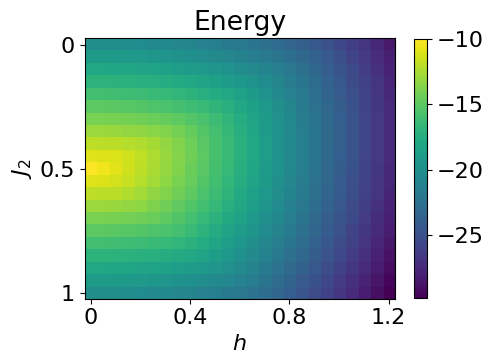

In [ ]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(5,5),dpi=100)

plt.imshow(data_exact['energies'])
plt.ylabel(r'$J_2$')
plt.xlabel(r'$h$')
plt.colorbar(shrink=0.675)
plt.title(r'Energy')


y_tick_positions = [0,10,20]  # Positions for the ticks
y_tick_labels = ['0', '0.5', '1']  # Labels for the ticks
plt.yticks(y_tick_positions, y_tick_labels)

x_tick_positions = [0, 8, 16, 24]  # Positions for the ticks
x_tick_labels = ['0', '0.4', '0.8', '1.2']  # Labels for the ticks
plt.xticks(x_tick_positions, x_tick_labels)

plt.show()

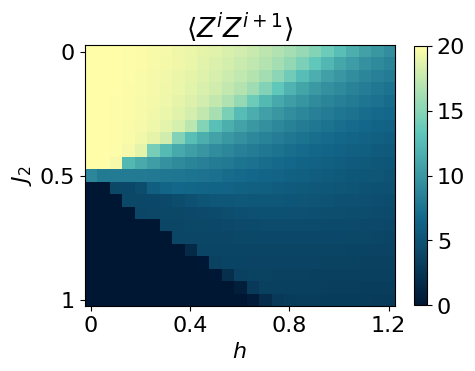

In [ ]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(5,5),dpi=100)

custom_palette = ['#001733', '#13678A', '#60C7BB', '#FFFDA8']
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
#cmap = ListedColormap(custom_palette)
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)

plt.imshow(data_exact['corr_gs'], cmap=cmap)
plt.ylabel(r'$J_2$')
plt.xlabel(r'$h$')
plt.colorbar(shrink=0.675)
plt.title(r'$\langle Z^iZ^{i+1}\rangle$')


y_tick_positions = [0,10,20]  # Positions for the ticks
y_tick_labels = ['0', '0.5', '1']  # Labels for the ticks
plt.yticks(y_tick_positions, y_tick_labels)

x_tick_positions = [0, 8, 16, 24]  # Positions for the ticks
x_tick_labels = ['0', '0.4', '0.8', '1.2']  # Labels for the ticks
plt.xticks(x_tick_positions, x_tick_labels)

plt.show()

### sampling of the spin config.

In [ ]:

#@jax.jit
def sample_spin_configurations(wave_function, num_samples, N, rng_key):
    """sampling spin config. from the exact GS computed by exact diag."""
    wave_function = wave_function.reshape(-1)
    probabilities = jnp.abs(wave_function) ** 2

    # Sample indices based on probabilities
    sampled_indices = jax.random.choice(
        rng_key,
        a=len(probabilities),
        p=probabilities,
        shape=(num_samples,),
        replace=True
    )

    # Convert sampled indices to spin configurations
    def int_to_spin_config(idx):
        return jnp.array([(idx >> i) & 1 for i in range(N)])

    spin_configurations = jax.vmap(int_to_spin_config)(sampled_indices)

    # Convert {0,1} -> {-1,1}
    spin_configurations = 2 * spin_configurations - 1
    return spin_configurations




In [ ]:
#creat the dataset

all_J2 = jnp.arange(0.0, 1.05, 0.05)
all_h = jnp.arange(0, 2.05, 0.05)[:25]


is_test_set = False
N = 20

num_sample_per_params = 10000
dataset = jnp.zeros([jnp.size(all_J2), jnp.size(all_h), num_sample_per_params, N])

key = jax.random.PRNGKey(10+is_test_set*10)

wave_fcts = data_exact['wave_fcts']

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):
      print('J2: {}, h: {}'.format(J2,h))
      key, subkey = jax.random.split(key)
      samples = sample_spin_configurations(wave_fcts[i,j], num_samples=num_sample_per_params, N=N, rng_key=key)
      dataset = dataset.at[i,j].set(samples)


J2: 0.0, h: 0.0
J2: 0.0, h: 0.05
J2: 0.0, h: 0.1
J2: 0.0, h: 0.15000000000000002
J2: 0.0, h: 0.2
J2: 0.0, h: 0.25
J2: 0.0, h: 0.30000000000000004
J2: 0.0, h: 0.35000000000000003
J2: 0.0, h: 0.4
J2: 0.0, h: 0.45
J2: 0.0, h: 0.5
J2: 0.0, h: 0.55
J2: 0.0, h: 0.6000000000000001
J2: 0.0, h: 0.65
J2: 0.0, h: 0.7000000000000001
J2: 0.0, h: 0.75
J2: 0.0, h: 0.8
J2: 0.0, h: 0.8500000000000001
J2: 0.0, h: 0.9
J2: 0.0, h: 0.9500000000000001
J2: 0.0, h: 1.0
J2: 0.0, h: 1.05
J2: 0.0, h: 1.1
J2: 0.0, h: 1.1500000000000001
J2: 0.0, h: 1.2000000000000002
J2: 0.05, h: 0.0
J2: 0.05, h: 0.05
J2: 0.05, h: 0.1
J2: 0.05, h: 0.15000000000000002
J2: 0.05, h: 0.2
J2: 0.05, h: 0.25
J2: 0.05, h: 0.30000000000000004
J2: 0.05, h: 0.35000000000000003
J2: 0.05, h: 0.4
J2: 0.05, h: 0.45
J2: 0.05, h: 0.5
J2: 0.05, h: 0.55
J2: 0.05, h: 0.6000000000000001
J2: 0.05, h: 0.65
J2: 0.05, h: 0.7000000000000001
J2: 0.05, h: 0.75
J2: 0.05, h: 0.8
J2: 0.05, h: 0.8500000000000001
J2: 0.05, h: 0.9
J2: 0.05, h: 0.9500000000000001
J

In [ ]:
with open('dataset_J1J2N20.pkl', 'wb') as f:
    pickle.dump(dataset, f)


In [ ]:
#creat the testset

all_J2 = jnp.arange(0.0, 1.05, 0.05)
all_h = jnp.arange(0, 2.05, 0.05)[:25]


is_test_set = True
N = 20

num_sample_per_params = 10000
testset = jnp.zeros([jnp.size(all_J2), jnp.size(all_h), num_sample_per_params, N])

key = jax.random.PRNGKey(10+is_test_set*10)

wave_fcts = data_exact['wave_fcts']

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):
      print('J2: {}, h: {}'.format(J2,h))
      key, subkey = jax.random.split(key)
      samples = sample_spin_configurations(wave_fcts[i,j], num_samples=num_sample_per_params, N=N, rng_key=key)
      testset = testset.at[i,j].set(samples)


J2: 0.0, h: 0.0
J2: 0.0, h: 0.05
J2: 0.0, h: 0.1
J2: 0.0, h: 0.15000000000000002
J2: 0.0, h: 0.2
J2: 0.0, h: 0.25
J2: 0.0, h: 0.30000000000000004
J2: 0.0, h: 0.35000000000000003
J2: 0.0, h: 0.4
J2: 0.0, h: 0.45
J2: 0.0, h: 0.5
J2: 0.0, h: 0.55
J2: 0.0, h: 0.6000000000000001
J2: 0.0, h: 0.65
J2: 0.0, h: 0.7000000000000001
J2: 0.0, h: 0.75
J2: 0.0, h: 0.8
J2: 0.0, h: 0.8500000000000001
J2: 0.0, h: 0.9
J2: 0.0, h: 0.9500000000000001
J2: 0.0, h: 1.0
J2: 0.0, h: 1.05
J2: 0.0, h: 1.1
J2: 0.0, h: 1.1500000000000001
J2: 0.0, h: 1.2000000000000002
J2: 0.05, h: 0.0
J2: 0.05, h: 0.05
J2: 0.05, h: 0.1
J2: 0.05, h: 0.15000000000000002
J2: 0.05, h: 0.2
J2: 0.05, h: 0.25
J2: 0.05, h: 0.30000000000000004
J2: 0.05, h: 0.35000000000000003
J2: 0.05, h: 0.4
J2: 0.05, h: 0.45
J2: 0.05, h: 0.5
J2: 0.05, h: 0.55
J2: 0.05, h: 0.6000000000000001
J2: 0.05, h: 0.65
J2: 0.05, h: 0.7000000000000001
J2: 0.05, h: 0.75
J2: 0.05, h: 0.8
J2: 0.05, h: 0.8500000000000001
J2: 0.05, h: 0.9
J2: 0.05, h: 0.9500000000000001
J

## Deterministic decoder

### Code

In [ ]:
import optax
from flax import linen as nn


### MODEL ###



class CircularConv1D(nn.Module):
    """Custom conv. layer to apply a circular padding"""
    features: int
    kernel_size: int
    strides: int = 1
    use_bias: bool = True

    @nn.compact
    def __call__(self, x):
        # x shape: (batch, length, channels)
        pad_size = self.kernel_size // 2
        # Circular padding along the spin chain
        x = jnp.pad(x, ((0, 0), (pad_size, pad_size), (0, 0)), mode='wrap')
        # 1D conv.
        x = nn.Conv(
            features=self.features,
            kernel_size=(self.kernel_size,),
            strides=(self.strides,),
            padding='VALID',
            use_bias=self.use_bias
        )(x)
        return x


class EncoderCNN(nn.Module):
    """Conv. encoder module"""
    latent_dim: int

    @nn.compact
    def __call__(self, x):
        x = x.reshape((x.shape[0], x.shape[1], 1))  # Reshape to (batch, N, 1)
        # Conv.blocks
        x = CircularConv1D(features=32, kernel_size=3, strides=1)(x)
        x = nn.relu(x)

        x = CircularConv1D(features=32, kernel_size=3, strides=1)(x)
        x = nn.relu(x)

        # Global Average Pooling over the spatial dimension (axis=1)
        x = x.mean(axis=1)  # x has shape (batch, features)

        # Dense layers
        mean = nn.Dense(features=64)(x)
        mean = nn.relu(mean)
        mean = nn.Dense(features=self.latent_dim)(mean)

        logvar = nn.Dense(features=64)(x)
        logvar = nn.relu(logvar)
        logvar = nn.Dense(features=self.latent_dim)(logvar)


        return mean, logvar



class Decoder(nn.Module):
    """Decoder module of the dVAE"""
    @nn.compact
    def __call__(self, z):

        N = 20
        alpha = 4

        z = nn.Dense(N*alpha)(z)
        z = nn.relu(z)
        z = nn.Dense(N*alpha)(z)
        z = nn.relu(z)
        z = nn.tanh(nn.Dense(N)(z))
        return z


class VAE(nn.Module):
   """Entire VAE model"""
    latent_dim: int

    def setup(self):
        self.encoder = EncoderCNN(self.latent_dim)
        self.decoder = Decoder()

    def reparameterize(self, mean, logvar, key):
        # Reparameterization trick
        std = jnp.exp(0.5 * logvar)
        eps = jax.random.normal(key, mean.shape)
        return mean + eps * std

    def __call__(self, x, key):

        mean, logvar = self.encoder(x)
        z = self.reparameterize(mean, logvar, key)
        recon_x = self.decoder(z)

        return recon_x, mean, logvar, z


### LOSS ###


#code inspired from the following pytorch implementation https://github.com/YannDubs/disentangling-vae/tree/master

def log_density_gaussian(x, mu, logvar):
    """Calculates log density of a Gaussian."""
    normalization = -0.5 * (jnp.log(2 * jnp.pi) + logvar)
    inv_var = jnp.exp(-logvar)
    log_density = normalization - 0.5 * ((x - mu) ** 2 * inv_var)
    return log_density

def matrix_log_density_gaussian(x, mu, logvar):
    """Calculates log density of a Gaussian for all batch pairs."""
    batch_size, dim = x.shape
    x = x[:, None, :]
    mu = mu[None, :, :]
    logvar = logvar[None, :, :]
    return log_density_gaussian(x, mu, logvar)

def log_importance_weight_matrix(batch_size, dataset_size):
    """Calculates a log importance weight matrix."""
    N = dataset_size
    M = batch_size - 1
    strat_weight = (N - M) / (N * M)
    W = jnp.full((batch_size, batch_size), 1 / M)
    W = W.at[jnp.diag_indices(batch_size)].set(1 / N)
    W = W.at[jnp.arange(1, batch_size), jnp.arange(batch_size - 1)].set(strat_weight)
    W = W.at[M - 1, 0].set(strat_weight)
    return jnp.log(W)

def _get_log_pz_qz_prodzi_qzCx(latent_sample, latent_dist, n_data, is_mss=True):
    batch_size, hidden_dim = latent_sample.shape

    # calculate log q(z|x)
    log_q_zCx = log_density_gaussian(latent_sample, *latent_dist).sum(axis=1)

    # calculate log p(z) (standard normal prior)
    zeros = jnp.zeros_like(latent_sample)
    log_pz = log_density_gaussian(latent_sample, zeros, zeros).sum(axis=1)

    mat_log_qz = matrix_log_density_gaussian(latent_sample, *latent_dist)

    if is_mss:
        # use stratification
        log_iw_mat = log_importance_weight_matrix(batch_size, n_data)
        mat_log_qz = mat_log_qz + log_iw_mat[:, :, None]

    log_qz = jax.scipy.special.logsumexp(mat_log_qz.sum(axis=2), axis=1)
    log_prod_qzi = jax.scipy.special.logsumexp(mat_log_qz, axis=1).sum(axis=1)

    return log_pz, log_qz, log_prod_qzi, log_q_zCx



def compute_loss(params, batch, alpha, beta, gamma, key):
    """Compute the VAE loss."""

    loss = 0
    # Forward pass to get the latent vect. and the reconstructed spin config
    recon_x, mean, logvar, z = vae.apply({'params': params}, batch, key)

    # Reconstruction loss (Mean Squared Error)
    x = batch
    recon_loss = jnp.mean(jnp.square(x - recon_x))


    # KL-divergence loss
    kl_loss = -beta * jnp.sum(1 + logvar - jnp.square(mean) - jnp.exp(logvar))

    log_pz, log_qz, log_prod_qzi, log_q_zCx  = _get_log_pz_qz_prodzi_qzCx(latent_sample=z, latent_dist=(mean,logvar), n_data=jnp.shape(z)[0], is_mss=True)

    mi_loss = (log_q_zCx - log_qz).mean()
    tc_loss = (log_qz - log_prod_qzi).mean()
    dw_kl_loss = (log_prod_qzi - log_pz).mean()


    loss = recon_loss + alpha*mi_loss + beta*tc_loss + gamma*dw_kl_loss

    return loss/jnp.shape(x)[0]


val_grad_fn = jax.jit(jax.value_and_grad(compute_loss))




@jax.jit
def MSE_loss(params, batch, key):

    recon_x, mean, logvar, z = vae.apply({'params': params}, batch, key)
    x = batch
    recon_loss = jnp.mean(jnp.square(x - recon_x))

    return recon_loss/jnp.shape(x)[0]

@jax.jit
def KL_loss(params, batch, key):

    recon_x, mean, logvar, z = vae.apply({'params': params}, batch, key)
    beta = 1.
    kl_loss = -beta * jnp.sum(1 + logvar - jnp.square(mean) - jnp.exp(logvar))
    loss = kl_loss
    x = batch
    return loss/jnp.shape(x)[0]



### TRAIN SET ###

def batch_data(dataset, batch_size):
  num_samples = dataset.shape[0]
  num_batches = num_samples // batch_size
  batches = []
  for i in range(num_batches):
    batch = dataset[i * batch_size : (i + 1) * batch_size]
    batches.append(batch)
  return batches

def batch_data_suffled(dataset, batch_size, key):
  """From the training set, creat batches with spin config coming from GS of H with various params."""

  num_samples = dataset.shape[0]
  # Create a permutation of indices
  permutation = jax.random.permutation(key, jnp.arange(num_samples))
  # Shuffle the dataset
  shuffled_dataset = dataset[permutation]
  # Create batches from the shuffled dataset
  num_batches = num_samples // batch_size
  batches = []
  for i in range(num_batches):
    batch = shuffled_dataset[i * batch_size : (i + 1) * batch_size]
    batches.append(batch)
  return batches


batches = batch_data_suffled(dataset.reshape(-1,N), batch_size=10000, key=jax.random.PRNGKey(123567))
batches = jax.device_put(batches)


def lin_annealing(step, total_steps, max, min):
  """linear schedule used for the gamma hyperparams in the TC loss"""
  gamma = max - (step / total_steps) * (max - min)
  return gamma



### Training

alpha: 0, beta: 0, gamma_max: 0.0
step: 0, loss: 0.00011842618627713156, KL: 0.09464620262183744, MSE: 0.00011477589709268051
logvar: [0.07170086]
step: 10, loss: 7.461706363050631e-05, KL: 12.658447178997777, MSE: 7.461675485925969e-05
logvar: [-12.21603434]


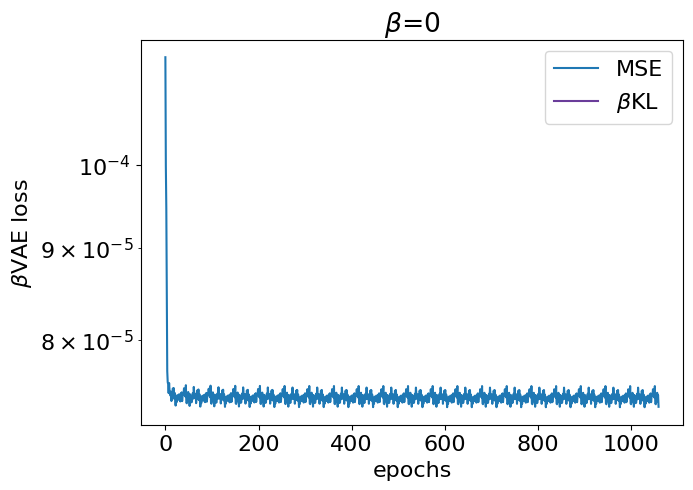

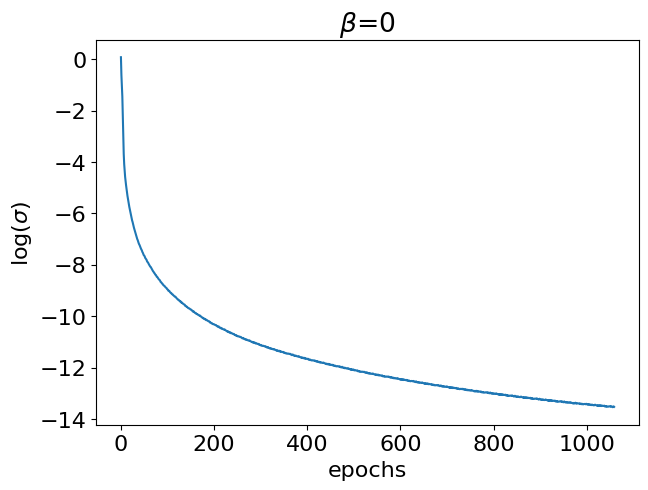

In [ ]:
gamma_min = 0
alphas = [0]
betas = [0]
gammas = [0.]

for m in range(1): #if we want to average over many models
    for alpha in alphas:
      for beta in betas:
        for gamma_max in gammas:


            print('alpha: {}, beta: {}, gamma_max: {}'.format(alpha, beta, gamma_max))


            ### INITIALIZATION ###

            input_init = batches[0]
            rng = jax.random.PRNGKey(1234+m)
            key_init = jax.random.PRNGKey(124+m)
            key = jax.random.PRNGKey(12+m)



            latent_dim = 1
            vae = VAE(latent_dim=latent_dim)
            params = vae.init(rng, input_init, key_init)['params']
            params = jax.device_put(params)

            lr = 0.001
            opt = optax.adabelief(learning_rate=lr)
            opt_state = opt.init(params)

            history_loss = []
            history_loss_KL = []
            history_loss_MSE = []


            num_epochs = 20


            history_logvar = []




            ### TRAINING ###


            for i in range(num_epochs):
              for j, batch in enumerate(batches):

                key = jax.random.split(key)[0]

                num_epochs_max = 100

                gamma = lin_annealing(i*40+j, 40*num_epochs_max, gamma_min, gamma_max)

                val, grad = val_grad_fn(params, batch, alpha, beta, gamma, key)
                updates, opt_state = opt.update(grad, opt_state, params)
                params = optax.apply_updates(params, updates)

                if j%10==0:
                      history_loss.append(val.tolist())
                      KL = KL_loss(params, batch, key).tolist()
                      history_loss_KL.append(KL)
                      MSE = MSE_loss(params, batch, key).tolist()
                      history_loss_MSE.append(MSE)


                      recon_x, mean, logvar, z = vae.apply({'params': params}, batch, key)
                      history_logvar.append(logvar)

                if i%10==0 and j==0:
                      print("step: {}, loss: {}, KL: {}, MSE: {}".format(i,val,KL,MSE))
                      print("logvar: {}".format(jnp.mean(logvar, axis=0)))



            history_logvar = jnp.array(history_logvar)

            plt.rcParams['font.size'] = 16
            plt.figure(figsize=(7,5),dpi=100)


            plt.semilogy(history_loss_MSE,color=sns.color_palette('Paired')[1], label="MSE")
            plt.semilogy(beta*jnp.array(history_loss_KL),color=sns.color_palette('Paired')[9], label=r'$\beta$KL')
            plt.legend()
            plt.xlabel('epochs')
            plt.ylabel(r'$\beta$VAE loss')
            plt.title(r'$\beta$='+str(beta))
            plt.show()

            plt.rcParams['font.size'] = 16
            plt.figure(figsize=(7,5),dpi=100)

            plt.plot([jnp.mean(history_logvar[i], axis=0) for i in range(len(history_logvar))])
            plt.xlabel('epochs')
            plt.ylabel(r'$\log(\sigma)$')
            plt.title(r'$\beta$='+str(beta))
            plt.show()

            data = {'params': params, 'history_loss': history_loss, 'history_loss_KL': history_loss_KL, 'history_loss_MSE': history_loss_MSE, 'beta':beta, 'history_logvar': history_logvar, 'history_loss_MI': history_loss_MI, 'history_loss_TC': history_loss_TC, 'history_loss_DW': history_loss_DW}
            with open('J1J2N20_data_model_DETconv_woKL1lat.pkl', 'wb') as f:
                pickle.dump(data, f)




### Results

In [ ]:
with open('J1J2N20_data_model_DETconv_woKL1lat.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
## GET THE MEAN AND LOGVAR AFTER TRAINING FOR THE WHOLE DATASET

N = 20
hi = nk.hilbert.Spin(s=1/2, N=N)


J1 = -1.


all_J2 = jnp.arange(0.0, 1.05, 0.05)
all_h = jnp.arange(0, 1.25, 0.05)



latent_dim = 1
vae = VAE(latent_dim=latent_dim)


all_mean = jnp.zeros((len(all_J2),len(all_h),latent_dim))
all_mean_abs = jnp.zeros((len(all_J2),len(all_h),latent_dim))
all_logvar = jnp.zeros((len(all_J2),len(all_h),latent_dim))
all_all_mean = jnp.zeros((len(all_J2),len(all_h),jnp.shape(dataset)[2],latent_dim))
all_recon_x = jnp.zeros((len(all_J2),len(all_h),jnp.shape(dataset)[2],N))

#params = data['params']

key = jax.random.PRNGKey(123)

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):

      d = testset[i,j]
      key = jax.random.split(key)[0]
      recon_x, means, logvar, _ = vae.apply({'params': params}, d, key)

      all_mean = all_mean.at[i,j].set(jnp.mean(means,axis=0))
      all_all_mean = all_all_mean.at[i,j].set(means)
      all_logvar = all_logvar.at[i,j].set(jnp.mean(logvar,axis=0))

      all_recon_x = all_recon_x.at[i,j].set(recon_x)


# sort the logvar
idx = jnp.argsort(jnp.mean(all_logvar, axis=(0,1)))[:2]


In [ ]:
with open('J1J2N20_mu0_model_DETconv_woKL1lat.pkl', 'wb') as f:
  pickle.dump(all_all_mean[:,:,:,idx[0]], f)

In [ ]:
key = jax.random.PRNGKey(191817)
all_recon_x = jax.random.bernoulli(key, (all_recon_x+1)/2, shape=jnp.shape(all_recon_x))*2-1


with open('J1J2N20_all_recon_x_model_DETconv_woKL1lat.pkl', 'wb') as f:
  pickle.dump(all_recon_x, f)

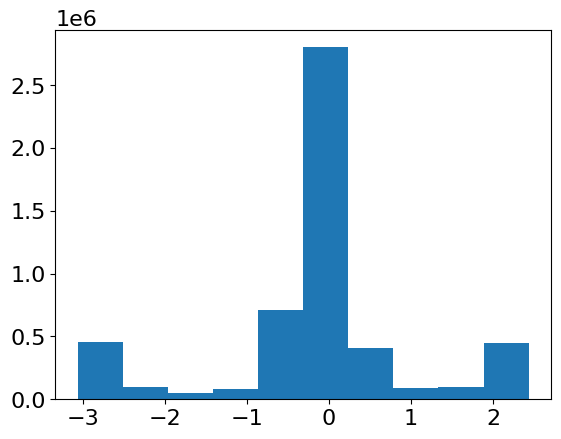

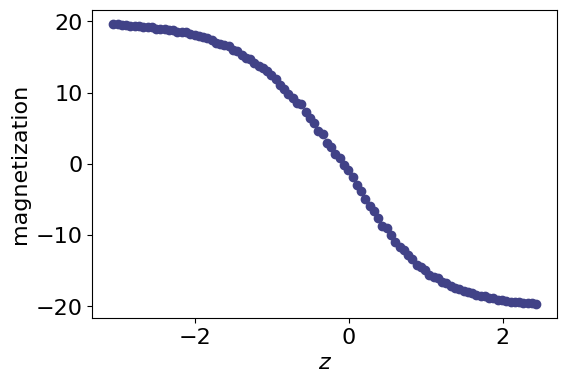

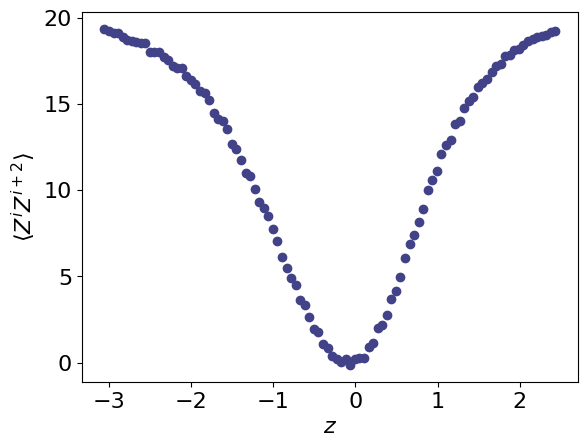

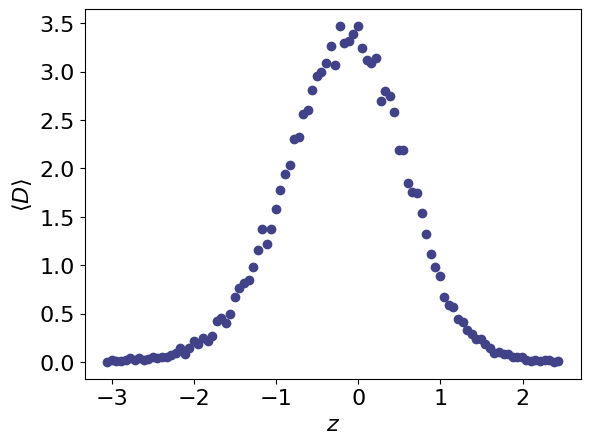

In [ ]:
#conv 1 lat
nbr_mu = 100

#mu = jnp.linspace(-2.5,2.5,nbr_mu)
mu_hist = plt.hist(all_all_mean[:,:,:,idx[0]].reshape(-1))[1]
mu = jnp.linspace(mu_hist[0],mu_hist[-1],nbr_mu)

key = jax.random.PRNGKey(42)

N = 20
all_S_mu = jnp.zeros((jnp.shape(mu)[0],1000, N))

decoder = Decoder()

for j,k in enumerate(mu):

  m = mu[j]*jnp.ones((1000,))
  z = jnp.zeros((1000,1))
  z =  z.at[:,idx[0]].set(m)
  key, _ = jax.random.split(key)

  p = (decoder.apply({'params': params['decoder']}, z)+1)/2
  key = jax.random.split(key)[0]
  S = jax.random.bernoulli(key, p, shape=jnp.shape(S))*2-1
  all_S_mu = all_S_mu.at[j,:].set(S)

    #plot_samples_mu12(all_S_mu12)




### Generalization

In [ ]:
all_J2 = jnp.arange(0.0, 1.05, 0.05)
all_h = jnp.arange(0, 2.05, 0.05)[:25]
all_h_hole = jnp.concatenate([all_h[:9],all_h[15:]],axis=0)


is_test_set = False
N = 20

num_sample_per_params = 10000
dataset = jnp.zeros([jnp.size(all_J2), jnp.size(all_h_hole), num_sample_per_params, N])

key = jax.random.PRNGKey(10+is_test_set*10)

wave_fcts = data_exact['wave_fcts']

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h_hole):
      print('J2: {}, h: {}'.format(J2,h))
      key, subkey = jax.random.split(key)
      jj = jnp.argwhere(all_h==h)[0,0]
      samples = sample_spin_configurations(wave_fcts[i,jj], num_samples=num_sample_per_params, N=N, rng_key=key)
      dataset = dataset.at[i,j].set(samples)


J2: 0.0, h: 0.0
J2: 0.0, h: 0.05
J2: 0.0, h: 0.1
J2: 0.0, h: 0.15000000000000002
J2: 0.0, h: 0.2
J2: 0.0, h: 0.25
J2: 0.0, h: 0.30000000000000004
J2: 0.0, h: 0.35000000000000003
J2: 0.0, h: 0.4
J2: 0.0, h: 0.75
J2: 0.0, h: 0.8
J2: 0.0, h: 0.8500000000000001
J2: 0.0, h: 0.9
J2: 0.0, h: 0.9500000000000001
J2: 0.0, h: 1.0
J2: 0.0, h: 1.05
J2: 0.0, h: 1.1
J2: 0.0, h: 1.1500000000000001
J2: 0.0, h: 1.2000000000000002
J2: 0.05, h: 0.0
J2: 0.05, h: 0.05
J2: 0.05, h: 0.1
J2: 0.05, h: 0.15000000000000002
J2: 0.05, h: 0.2
J2: 0.05, h: 0.25
J2: 0.05, h: 0.30000000000000004
J2: 0.05, h: 0.35000000000000003
J2: 0.05, h: 0.4
J2: 0.05, h: 0.75
J2: 0.05, h: 0.8
J2: 0.05, h: 0.8500000000000001
J2: 0.05, h: 0.9
J2: 0.05, h: 0.9500000000000001
J2: 0.05, h: 1.0
J2: 0.05, h: 1.05
J2: 0.05, h: 1.1
J2: 0.05, h: 1.1500000000000001
J2: 0.05, h: 1.2000000000000002
J2: 0.1, h: 0.0
J2: 0.1, h: 0.05
J2: 0.1, h: 0.1
J2: 0.1, h: 0.15000000000000002
J2: 0.1, h: 0.2
J2: 0.1, h: 0.25
J2: 0.1, h: 0.30000000000000004
J2:

In [ ]:
batches = batch_data_suffled(dataset.reshape(-1,N), batch_size=10000, key=jax.random.PRNGKey(123567))
batches = jax.device_put(batches)
input_init = batches[0]

alpha: 0, beta: 0, gamma_max: 0.0
step: 0, loss: 0.00011836917947482811, KL: 0.09575624113560767, MSE: 0.00011473226568198653
logvar: [0.07294918]
step: 10, loss: 7.469355563442512e-05, KL: 12.416317303416806, MSE: 7.4693702946415e-05
logvar: [-11.70929701]


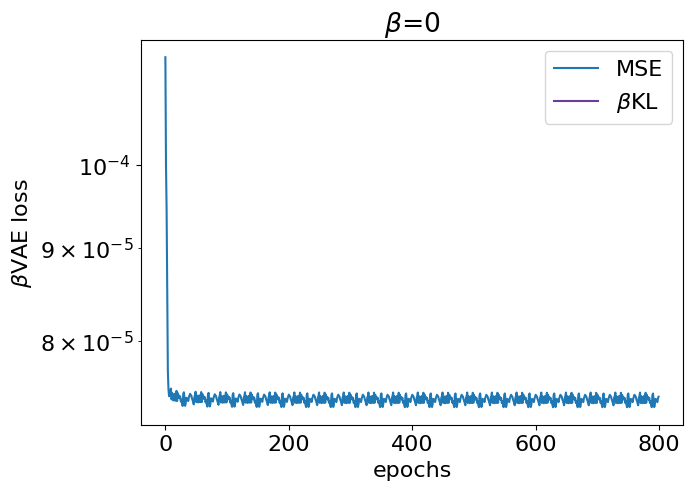

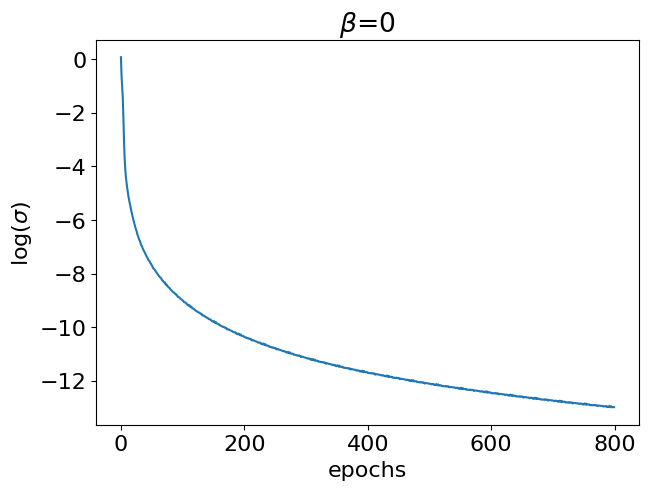

In [ ]:
gamma_min = 0.0000
alphas = [0]
betas = [0]
gammas = [0.]

for m in range(1):


    for alpha in alphas:
      for beta in betas:
        for gamma_max in gammas:


            print('alpha: {}, beta: {}, gamma_max: {}'.format(alpha, beta, gamma_max))


            ### INITIALIZATION ###

            input_init = batches[0]
            rng = jax.random.PRNGKey(1234+m)
            key_init = jax.random.PRNGKey(124+m)
            key = jax.random.PRNGKey(12+m)



            latent_dim = 1
            vae = VAE(latent_dim=latent_dim)
            params = vae.init(rng, input_init, key_init)['params']
            params = jax.device_put(params)

            lr = 0.001
            opt = optax.adabelief(learning_rate=lr)
            opt_state = opt.init(params)

            history_loss = []
            history_loss_KL = []
            history_loss_MSE = []
            history_loss_MI = []
            history_loss_TC = []
            history_loss_DW = []


            num_epochs = 20


            history_logvar = []




            ### TRAINING ###


            for i in range(num_epochs):
              for j, batch in enumerate(batches):

                key = jax.random.split(key)[0]

                num_epochs_max = 100

                gamma = lin_annealing(i*40+j, 40*num_epochs_max, gamma_min, gamma_max)

                val, grad = val_grad_fn(params, batch, alpha, beta, gamma, key)
                updates, opt_state = opt.update(grad, opt_state, params)
                params = optax.apply_updates(params, updates)

                if j%10==0:
                      history_loss.append(val.tolist())
                      KL = KL_loss(params, batch, key).tolist()
                      history_loss_KL.append(KL)
                      MSE = MSE_loss(params, batch, key).tolist()
                      history_loss_MSE.append(MSE)

                      recon_x, mean, logvar, z = vae.apply({'params': params}, batch, key)
                      history_logvar.append(logvar)

                if i%10==0 and j==0:
                      print("step: {}, loss: {}, KL: {}, MSE: {}".format(i,val,KL,MSE))
                      print("logvar: {}".format(jnp.mean(logvar, axis=0)))



            history_logvar = jnp.array(history_logvar)

            plt.rcParams['font.size'] = 16
            plt.figure(figsize=(7,5),dpi=100)

            #beta = 5e-5
            #plt.semilogy(jnp.array(history_loss_KL)*0+13*beta,color=sns.color_palette('Paired')[9], label="KL")
            plt.semilogy(history_loss_MSE,color=sns.color_palette('Paired')[1], label="MSE")
            plt.semilogy(beta*jnp.array(history_loss_KL),color=sns.color_palette('Paired')[9], label=r'$\beta$KL')
            #plt.semilogy(jnp.array(history_loss_MSE)+beta*jnp.array(history_loss_KL),color=sns.color_palette('Paired')[0], label="tot")
            plt.legend()
            #plt.xlim([-10,500])
            plt.xlabel('epochs')
            plt.ylabel(r'$\beta$VAE loss')
            plt.title(r'$\beta$='+str(beta))
            plt.show()

            plt.rcParams['font.size'] = 16
            plt.figure(figsize=(7,5),dpi=100)

            plt.plot([jnp.mean(history_logvar[i], axis=0) for i in range(len(history_logvar))])
            plt.xlabel('epochs')
            plt.ylabel(r'$\log(\sigma)$')
            plt.title(r'$\beta$='+str(beta))
            plt.show()

            data = {'params': params, 'history_loss': history_loss, 'history_loss_KL': history_loss_KL, 'history_loss_MSE': history_loss_MSE, 'beta':beta, 'history_logvar': history_logvar, 'history_loss_MI': history_loss_MI, 'history_loss_TC': history_loss_TC, 'history_loss_DW': history_loss_DW}
            with open('J1J2N20_hole_data_model_DETconv_woKL1lat.pkl', 'wb') as f:
                pickle.dump(data, f)



In [ ]:
all_RC = jnp.zeros((len(all_J2),len(all_h)))
key = jax.random.PRNGKey(0)
#params = data['params']
#testset = dataset
for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):
    key, _ = jax.random.split(key)
    RC = MSE_loss(params, testset[i,j], key).tolist()
    all_RC = all_RC.at[i,j].set(RC)


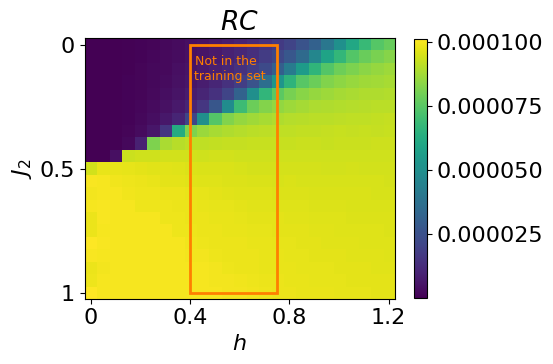

In [ ]:
import matplotlib.patches as patches
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(5,5),dpi=100)

im = ax.imshow(all_RC)
ax.set_ylabel(r'$J_2$')
ax.set_xlabel(r'$h$')
ax.set_title(r'$RC$')
plt.colorbar(im, shrink=0.675)#, label=r'$\langle Z^i \, Z^{i+2} \rangle$')

y_tick_positions = [0,10,20]  # Positions for the ticks
y_tick_labels = ['0', '0.5', '1']  # Labels for the ticks
plt.yticks(y_tick_positions, y_tick_labels)

x_tick_positions = [0, 8, 16, 24]  # Positions for the ticks
x_tick_labels = ['0', '0.4', '0.8', '1.2']  # Labels for the ticks
plt.xticks(x_tick_positions, x_tick_labels)

rect = patches.Rectangle((8, 0), 7., 20, linewidth=2, edgecolor=sns.color_palette('Paired')[7], facecolor='none')
ax.add_patch(rect)
ax.text(11, 2, 'Not in the \n training set', color=rect.get_edgecolor(), ha='center', va='center', fontsize=9)


plt.show()

In [ ]:
with open('J1J2N20_hole_data_model_DETconv_woKL1lat.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
## GET THE MEAN AND LOGVAR AFTER TRAINING FOR THE WHOLE DATASET

N = 20
hi = nk.hilbert.Spin(s=1/2, N=N)


J1 = -1.


all_J2 = jnp.arange(0.0, 1.05, 0.05)
all_h = jnp.arange(0, 1.25, 0.05)



#testset = dataset

latent_dim = 1
vae = VAE(latent_dim=latent_dim)

#vae_apply_vmap = jax.jit(jax.vmap(vae.apply, in_axes=(None,0,None)))

all_mean = jnp.zeros((len(all_J2),len(all_h),latent_dim))
all_mean_abs = jnp.zeros((len(all_J2),len(all_h),latent_dim))
all_logvar = jnp.zeros((len(all_J2),len(all_h),latent_dim))
all_all_mean = jnp.zeros((len(all_J2),len(all_h),jnp.shape(dataset)[2],latent_dim))
all_recon_x = jnp.zeros((len(all_J2),len(all_h),jnp.shape(dataset)[2],N))

params = data['params']

key = jax.random.PRNGKey(123)

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):

      d = testset[i,j]
      key = jax.random.split(key)[0]
      recon_x, means, logvar, _ = vae.apply({'params': params}, d, key)

      all_mean = all_mean.at[i,j].set(jnp.mean(means,axis=0))
      all_all_mean = all_all_mean.at[i,j].set(means)
      all_logvar = all_logvar.at[i,j].set(jnp.mean(logvar,axis=0))
      all_recon_x = all_recon_x.at[i,j].set(recon_x)


# sort the logvar
idx = jnp.argsort(jnp.mean(all_logvar, axis=(0,1)))[:2]


In [ ]:
key = jax.random.PRNGKey(9988)
all_recon_x = jax.random.bernoulli(key, (all_recon_x+1)/2, shape=jnp.shape(all_recon_x))*2-1

with open('J1J2N20_hole_all_recon_x_model_DETconv_woKL1lat.pkl', 'wb') as f:
  pickle.dump(all_recon_x, f)

## Generative decoder

### Code

In [ ]:
import optax
from flax import linen as nn
from functools import partial
from netket import jax as nkjax
from modified_nk_ARNN import *



class CircularConv1D(nn.Module):
    """Custom conv. layer to apply a circular padding"""
    features: int
    kernel_size: int
    strides: int = 1
    use_bias: bool = True

    @nn.compact
    def __call__(self, x):
        # x shape: (batch, length, channels)
        pad_size = self.kernel_size // 2
        # Circular padding along the spin chain
        x = jnp.pad(x, ((0, 0), (pad_size, pad_size), (0, 0)), mode='wrap')
        # 1D conv.
        x = nn.Conv(
            features=self.features,
            kernel_size=(self.kernel_size,),
            strides=(self.strides,),
            padding='VALID',
            use_bias=self.use_bias
        )(x)
        return x


class EncoderCNN(nn.Module):
    """Conv. encoder module"""
    latent_dim: int

    @nn.compact
    def __call__(self, x):
        x = x.reshape((x.shape[0], x.shape[1], 1))  # Reshape to (batch, N, 1)
        # Conv.blocks
        x = CircularConv1D(features=32, kernel_size=3, strides=1)(x)
        x = nn.relu(x)

        x = CircularConv1D(features=32, kernel_size=3, strides=1)(x)
        x = nn.relu(x)

        # Global Average Pooling over the spatial dimension (axis=1)
        x = x.mean(axis=1)  # x has shape (batch, features)

        # Dense layers
        mean = nn.Dense(features=64)(x)
        mean = nn.relu(mean)
        mean = nn.Dense(features=self.latent_dim)(mean)

        logvar = nn.Dense(features=64)(x)
        logvar = nn.relu(logvar)
        logvar = nn.Dense(features=self.latent_dim)(logvar)


        return mean, logvar



class Encoder_and_latent(nn.Module):
    latent_dim: int

    def setup(self):
        self.encoder = EncoderCNN(self.latent_dim)



    def reparameterize(self, mean, logvar, key):
        # Reparameterization trick
        std = jnp.exp(0.5 * logvar)
        #std = jnp.exp(logvar)
        eps = jax.random.normal(key, mean.shape)
        return mean + eps * std

    def __call__(self, x, key):

        mean, logvar = self.encoder(x)
        z = self.reparameterize(mean, logvar, key)

        return mean, logvar, z





@partial(jax.jit, static_argnums=(0,))
def get_sample(model, params, latent_var, key):
    r"""
    get sample from NN in $s \in {-1, 1}$, just one sample for now
    params: Parameters of classical model
    model: Netket ARNN model
    latent_var: latent variable
    """
    size_batch = jnp.shape(latent_var)[0]
    latent_dim = jnp.shape(latent_var)[1]

    N = 20


    samples = jnp.zeros((size_batch,N+latent_dim))#container
    samples = samples.at[:,0:latent_dim].set(latent_var)

    for i in range(latent_dim, N+latent_dim):

        p = model.apply(params, samples, method=model.conditionals)[:,i,:]
        local_states = jnp.array([-1,1])#jnp.asarray(self.hilbert.local_states)
        key = jax.random.split(key)[0]
        spin_value_sampled = nkjax.batch_choice(key, local_states, p)

        samples = samples.at[:,i].set(spin_value_sampled)

    samples = samples[:,latent_dim:]

    return samples

@partial(jax.jit, static_argnums=(0,))
def get_sample_fast(model, params, latent_var, key):
    r"""
    get sample from NN in $s \in {-1, 1}$, just one sample for now
    params: Parameters of classical model
    model: Netket ARNN model
    latent_var: latent variable
    """
    size_batch = jnp.shape(latent_var)[0]
    latent_dim = jnp.shape(latent_var)[1]

    N = 20

    def scan_fn(carry, i):
        samples, key = carry
        p = model.apply(params, samples, method=model.conditionals)[:, i, :]
        local_states = jnp.array([-1, 1])
        key, subkey = jax.random.split(key)
        spin_value_sampled = nkjax.batch_choice(subkey, local_states, p)
        samples = samples.at[:, i].set(spin_value_sampled)
        return (samples, key), None

    # Initialize the carry with an empty array for samples and the key
    initial_samples = jnp.zeros((size_batch, N + latent_dim))
    initial_samples = initial_samples.at[:, 0:latent_dim].set(latent_var)
    carry = (initial_samples, key)

    # Perform the scan
    carry, _ = jax.lax.scan(scan_fn, carry, jnp.arange(latent_dim, N + latent_dim))

    # Extract the samples
    samples = carry[0][:, latent_dim:]

    return samples



def log_normal_pdf(mu, logvar, sample):
    return -0.5 * ((sample - mu) ** 2 * jnp.exp(-logvar) + logvar + jnp.log(2. * jnp.pi))


def log_density_gaussian(x, mu, logvar):
    """Calculates log density of a Gaussian."""
    normalization = -0.5 * (jnp.log(2 * jnp.pi) + logvar)
    inv_var = jnp.exp(-logvar)
    log_density = normalization - 0.5 * ((x - mu) ** 2 * inv_var)
    return log_density



#code inspired from the following pytorch implementation https://github.com/YannDubs/disentangling-vae/tree/master


def matrix_log_density_gaussian(x, mu, logvar):
    """Calculates log density of a Gaussian for all batch pairs."""
    batch_size, dim = x.shape
    x = x[:, None, :]
    mu = mu[None, :, :]
    logvar = logvar[None, :, :]
    return log_density_gaussian(x, mu, logvar)

def log_importance_weight_matrix(batch_size, dataset_size):
    """Calculates a log importance weight matrix."""
    N = dataset_size
    M = batch_size - 1
    strat_weight = (N - M) / (N * M)
    W = jnp.full((batch_size, batch_size), 1 / M)
    W = W.at[jnp.diag_indices(batch_size)].set(1 / N)
    W = W.at[jnp.arange(1, batch_size), jnp.arange(batch_size - 1)].set(strat_weight)
    W = W.at[M - 1, 0].set(strat_weight)
    return jnp.log(W)

def _get_log_pz_qz_prodzi_qzCx(latent_sample, latent_dist, n_data, is_mss=True):
    batch_size, hidden_dim = latent_sample.shape

    # calculate log q(z|x)
    log_q_zCx = log_density_gaussian(latent_sample, *latent_dist).sum(axis=1)

    # calculate log p(z) (standard normal prior)
    zeros = jnp.zeros_like(latent_sample)
    log_pz = log_density_gaussian(latent_sample, zeros, zeros).sum(axis=1)

    mat_log_qz = matrix_log_density_gaussian(latent_sample, *latent_dist)

    if is_mss:
        # use stratification
        log_iw_mat = log_importance_weight_matrix(batch_size, n_data)
        mat_log_qz = mat_log_qz + log_iw_mat[:, :, None]

    log_qz = jax.scipy.special.logsumexp(mat_log_qz.sum(axis=2), axis=1)
    log_prod_qzi = jax.scipy.special.logsumexp(mat_log_qz, axis=1).sum(axis=1)

    return log_pz, log_qz, log_prod_qzi, log_q_zCx






# Loss function
def compute_loss(params, batch, alpha, beta, gamma, key):


    params_encoder, params_decoder = params


    mean, logvar, z  = enc_lat.apply({'params': params_encoder}, batch, key)
    key = jax.random.split(key)[0]


    # Reconstruction loss
    x = batch
    inputs = jnp.concatenate((z, x), axis=1)
    p_i = decoder.apply(params_decoder, inputs, method=decoder.conditionals)[:,latent_dim:,:]
    eps = 1e-10
    log_p = (1-x)/2*jnp.log(p_i[:,:,0]+eps) + (1+x)/2*jnp.log(p_i[:,:,1]+eps)
    recon_loss = -jnp.sum(log_p)/jnp.shape(x)[0]  #double sum over samples in batch and spatial dimension


    #KL loss
    log_pz, log_qz, log_prod_qzi, log_q_zCx  = _get_log_pz_qz_prodzi_qzCx(latent_sample=z, latent_dist=(mean,logvar), n_data=jnp.shape(z)[0], is_mss=True)

    mi_loss = (log_q_zCx - log_qz).mean()
    tc_loss = (log_qz - log_prod_qzi).mean()
    dw_kl_loss = (log_prod_qzi - log_pz).mean()


    loss = recon_loss + alpha*mi_loss + beta*tc_loss + gamma*dw_kl_loss

    return loss


val_grad_fn = jax.jit(jax.value_and_grad(compute_loss))





@jax.jit
def all_KL_terms(params, batch, key):

    params_encoder, params_decoder = params

    mean, logvar, z  = enc_lat.apply({'params': params_encoder}, batch, key)
    key = jax.random.split(key)[0]

    #KL loss
    log_pz, log_qz, log_prod_qzi, log_q_zCx  = _get_log_pz_qz_prodzi_qzCx(latent_sample=z, latent_dist=(mean,logvar), n_data=jnp.shape(z)[0], is_mss=True)

    mi_loss = (log_q_zCx - log_qz).mean()
    tc_loss = (log_qz - log_prod_qzi).mean()
    dw_kl_loss = (log_prod_qzi - log_pz).mean()


    return mi_loss, tc_loss, dw_kl_loss




@jax.jit
def RC_loss(params, batch, key):


    params_encoder, params_decoder = params

    key = jax.random.split(key)[0]
    mean, logvar, z  = enc_lat.apply({'params': params_encoder}, batch, key)

    # Reconstruction loss
    x = batch
    inputs = jnp.concatenate((z, x), axis=1)
    eps = 1e-10
    p_i = decoder.apply(params_decoder, inputs, method=decoder.conditionals)[:,latent_dim:,:]
    log_p = (1-x)/2*jnp.log(p_i[:,:,0]+eps) + (1+x)/2*jnp.log(p_i[:,:,1]+eps) #last term: p_i[:,:,1] = 1-p_i[:,:,0]
    recon_loss = -jnp.sum(log_p) #double sum over samples in batch and spatial dimension

    return recon_loss/jnp.shape(x)[0]


@jax.jit
def KL_loss(params, batch, key):

    params_encoder, params_decoder = params
    key = jax.random.split(key)[0]
    mean, logvar, z  = enc_lat.apply({'params': params_encoder}, batch, key)

    kl = -0.5*jnp.sum(1 + logvar - jnp.square(mean) - jnp.exp(logvar))
    C = 0
    kl_loss = beta * jnp.abs(kl-C)
    loss = kl_loss
    x = batch
    return loss/jnp.shape(x)[0]


# TRAIN SET

def batch_data(dataset, batch_size):
  num_samples = dataset.shape[0]
  num_batches = num_samples // batch_size
  batches = []
  for i in range(num_batches):
    batch = dataset[i * batch_size : (i + 1) * batch_size]
    batches.append(batch)
  return batches

def batch_data_suffled(dataset, batch_size, key):
  """From the training set, creat batches with spin config coming from GS of H with various params."""
  num_samples = dataset.shape[0]
  # Create a permutation of indices
  permutation = jax.random.permutation(key, jnp.arange(num_samples))
  # Shuffle the dataset
  shuffled_dataset = dataset[permutation]
  # Create batches from the shuffled dataset
  num_batches = num_samples // batch_size
  batches = []
  for i in range(num_batches):
    batch = shuffled_dataset[i * batch_size : (i + 1) * batch_size]
    batches.append(batch)
  return batches



def lin_annealing(step, total_steps, max, min):
  beta = max - (step / total_steps) * (max - min)
  return beta


N = 20

In [ ]:
jnp.shape(batches)

(525, 10000, 20)

### Training

beta: 30,  gamma_max: 1.0, gamma_min: 0.1
step: 0, loss: -1079.1476061345465, bKL: 0.7810833315385639, RC: 39.41273300256279
logvar: [ 0.39591559  0.36899497  0.17379813  0.23124689 -0.21658317]
step: 1, loss: -1094.0855413913898, bKL: 6.616302297657998, RC: 7.084482320528116
logvar: [-0.18643557 -0.1264872  -0.1017808  -6.35504609 -0.0760189 ]
step: 2, loss: -1094.2417510293853, bKL: 6.625145784102992, RC: 6.914242013079958
logvar: [-0.1038124  -0.15417186 -0.0940693  -6.41178389 -0.09571622]
step: 3, loss: -1094.3322714020244, bKL: 6.80277994263782, RC: 6.843677427044646
logvar: [-0.12678223 -0.07209812 -0.03758228 -6.61604829 -0.04906759]
step: 4, loss: -1094.354383874495, bKL: 6.860787710229517, RC: 6.776101890911743
logvar: [-0.07088624 -0.04569131 -0.02878021 -6.73775159 -0.02092625]
step: 5, loss: -1094.401579040625, bKL: 6.9903767960828675, RC: 6.7295835716757635
logvar: [-0.01298993 -0.03333551 -0.0378137  -6.90079155 -0.0161437 ]
step: 6, loss: -1094.4402902393754, bKL: 7.173

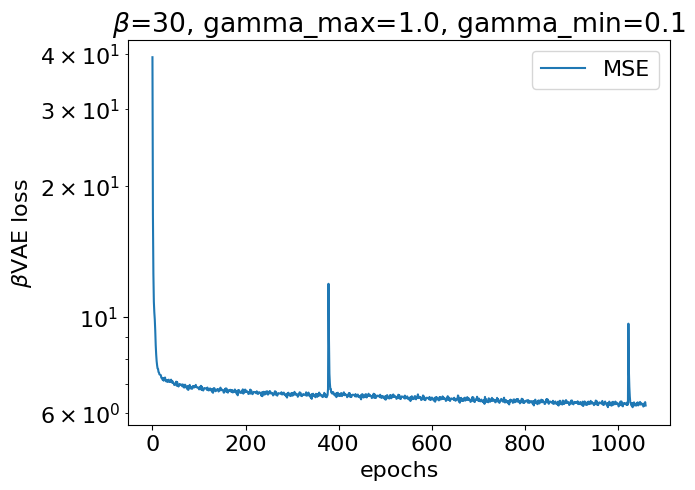

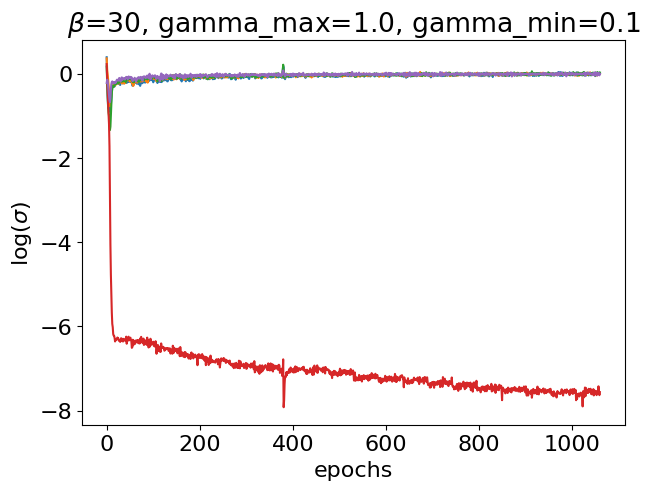

In [ ]:
alpha = 0.1

for gamma_min in [0.1]:
  for gamma_max in [1.0]:
    for beta in [30]:


      print('beta: {},  gamma_max: {}, gamma_min: {}'.format(beta,gamma_max, gamma_min))
      #for m in range(10): #if we want to average over many models

      m = 0

      ### INITIALIZATION ###

      #keys
      input_init = batches[0]
      rng = jax.random.PRNGKey(1234+m)
      key_init = jax.random.PRNGKey(124+m)
      key = jax.random.PRNGKey(12+m)


      #parameters of the VAE
      latent_dim =  5
      enc_lat = Encoder_and_latent(latent_dim=latent_dim)
      params_encoder = enc_lat.init(rng, input_init, key_init)['params']

      N = 20
      hi = nk.hilbert.Spin(s=1/2, N=N)
      decoder = ARNNDense(hilbert=hi, layers= 3, features=4*N)
      params_decoder = decoder.init(jax.random.PRNGKey(0), jnp.ones((1, N+latent_dim)))

      params = (params_encoder, params_decoder)


      #Optimizer
      lr = 0.001
      opt = optax.adabelief(learning_rate=lr)
      opt_state = opt.init(params)


      #Containers to store the values of the losses during the training
      history_loss = []
      history_loss_KL = []
      history_loss_RC = []
      history_loss_MI = []
      history_loss_TC = []
      history_loss_DW = []
      history_logvar = []


      num_epochs = 20



      ### TRAINING ###

      for i in range(num_epochs):
        for j, batch in enumerate(batches):

          key = jax.random.split(key)[0]
          tot_num_epochs = 100
          gamma = lin_annealing(i*40+j, 40*tot_num_epochs, gamma_min, gamma_max)

          val, grad = val_grad_fn(params, batch, alpha, beta, gamma, key)
          updates, opt_state = opt.update(grad, opt_state, params)
          params = optax.apply_updates(params, updates)

          if j%10==0:
                history_loss.append(val.tolist())
                KL = KL_loss(params, batch, key).tolist()
                history_loss_KL.append(KL)
                RC = RC_loss(params, batch, key).tolist()
                history_loss_RC.append(RC)


                mean, logvar, z = enc_lat.apply({'params': params[0]}, batch, key)
                history_logvar.append(logvar)


          if i%1==0 and j==0:
                print("step: {}, loss: {}, bKL: {}, RC: {}".format(i,val,KL,RC))
                print("logvar: {}".format(jnp.mean(logvar, axis=0)))







      history_logvar = jnp.array(history_logvar)

      plt.rcParams['font.size'] = 16
      plt.figure(figsize=(7,5),dpi=100)

      plt.semilogy(history_loss_RC,color=sns.color_palette('Paired')[1], label="MSE")
      #plt.semilogy(beta*jnp.array(history_loss_KL),color=sns.color_palette('Paired')[9], label=r'$\beta$KL')

      plt.legend()
      #plt.xlim([-10,500])
      plt.xlabel('epochs')
      plt.ylabel(r'$\beta$VAE loss')
      plt.title(r'$\beta$={}, gamma_max={}, gamma_min={}'.format(beta,gamma_max, gamma_min))
      plt.show()

      plt.rcParams['font.size'] = 16
      plt.figure(figsize=(7,5),dpi=100)

      plt.plot([jnp.mean(history_logvar[i], axis=0) for i in range(len(history_logvar))])
      plt.xlabel('epochs')
      plt.ylabel(r'$\log(\sigma)$')
      plt.title(r'$\beta$={}, gamma_max={}, gamma_min={}'.format(beta,gamma_max, gamma_min))
      plt.show()

      data = {'params': params, 'history_loss': history_loss, 'history_loss_KL': history_loss_KL, 'history_loss_RC': history_loss_RC, 'history_loss_DW': history_loss_DW, 'history_loss_MI': history_loss_MI, 'history_loss_MI': history_loss_MI, 'history_loss_TC': history_loss_TC, 'alpha_beta_gamma':[alpha, beta, gamma], 'history_logvar': history_logvar}
      with open('J1J2N20_data_model_ARconv_beta{}_gammamax{}_ gamma_min{}.pkl'.format(beta,gamma_max, gamma_min), 'wb') as f:
          pickle.dump(data, f)


In [ ]:
data = {'params': params, 'history_loss': history_loss, 'history_loss_KL': history_loss_KL, 'history_loss_RC': history_loss_RC, 'history_loss_DW': history_loss_DW, 'history_loss_MI': history_loss_MI, 'history_loss_MI': history_loss_MI, 'history_loss_TC': history_loss_TC, 'alpha_beta_gamma':[alpha, beta, gamma], 'history_logvar': history_logvar}
with open('J1J2N18_data_model_AR_beta{}_gammamax{}_ gamma_min{}.pkl'.format(beta,gamma_max, gamma_min), 'wb') as f:
    pickle.dump(data, f)


### Results

#### Latent space

In [ ]:
for gamma_min in [0.1]:
  for gamma_max in [1.]:
    for beta in [30]:
        with open('J1J2N20_data_model_ARconv_beta{}_gammamax{}_ gamma_min{}.pkl'.format(beta,gamma_max, gamma_min), 'rb') as f:
          data = pickle.load(f)
params = data['params']

In [ ]:
#parameters of the VAE
latent_dim =  5
enc_lat = Encoder_and_latent(latent_dim=latent_dim)

N = 20
hi = nk.hilbert.Spin(s=1/2, N=N)
decoder = ARNNDense(hilbert=hi, layers= 3, features=4*N)

In [ ]:
all_J2 = jnp.arange(0.0, 1.05, 0.05)
all_h = jnp.arange(0, 1.25, 0.05)



#testset = dataset

latent_dim = 5
enc_lat = Encoder_and_latent(latent_dim=latent_dim)
get_latent_var = jax.jit(enc_lat.apply)
decoder = ARNNDense(hilbert=hi, layers= 3, features=4*N)


all_mean = jnp.zeros((len(all_J2),len(all_h),latent_dim))
all_mean_abs = jnp.zeros((len(all_J2),len(all_h),latent_dim))
all_logvar = jnp.zeros((len(all_J2),len(all_h),latent_dim))
all_all_mean = jnp.zeros((len(all_J2),len(all_h),jnp.shape(dataset)[2],latent_dim))

params = data['params']
#params_encoder = params[0]


for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):

      d = testset[i,j]
      means, logvar, z  = get_latent_var({'params': params_encoder}, d, key)

      all_mean = all_mean.at[i,j].set(jnp.mean(means,axis=0))
      #all_mean_abs = all_mean_abs.at[i,j].set(jnp.mean(jnp.abs(means),axis=0))
      all_all_mean = all_all_mean.at[i,j].set(means)
      all_logvar = all_logvar.at[i,j].set(jnp.mean(logvar,axis=0))

      #all_mean = all_mean.at[i,j].set(mean)
      #all_logvar = all_logvar.at[i,j].set(logvar)



idx = jnp.argsort(jnp.mean(all_logvar, axis=(0,1)))[:2]


In [ ]:
latvar = {'mu0': all_all_mean[:,:,:,idx[0]], 'logvar0': all_logvar[:,:,idx[0]]}
with open('J1J2N20_latentvar_ARconv.pkl', 'wb') as f:
  pickle.dump(latvar, f)

In [ ]:
data_for_SR = {'mu2': all_all_mean[:,:,:,idx[1]], 'testset': testset}
with open('data_for_SR.pkl', 'wb') as f:
  pickle.dump(data_for_SR, f)

In [ ]:
@partial(jax.jit, static_argnums=(0,))
def get_sample_fast(model, params, latent_var, key):
    r"""
    get sample from NN in $s \in {-1, 1}$, autoregressif sampling, seed up with jax.lax.scan
    params: Parameters of decoder
    model: Netket ARNN model for the decoder
    latent_var: latent variable
    """
    size_batch = jnp.shape(latent_var)[0]
    latent_dim = jnp.shape(latent_var)[1]

    N = 20

    def scan_fn(carry, i):
        samples, key = carry
        p = model.apply(params, samples, method=model.conditionals)[:, i, :]
        local_states = jnp.array([-1, 1])
        key, subkey = jax.random.split(key)
        spin_value_sampled = nkjax.batch_choice(subkey, local_states, p)
        samples = samples.at[:, i].set(spin_value_sampled)
        return (samples, key), None

    # Initialize the carry with an empty array as a container for the samples and the key
    initial_samples = jnp.zeros((size_batch, N + latent_dim))
    initial_samples = initial_samples.at[:, 0:latent_dim].set(latent_var)
    carry = (initial_samples, key)

    # Perform the scan
    carry, _ = jax.lax.scan(scan_fn, carry, jnp.arange(latent_dim, N + latent_dim))

    # Extract the samples
    samples = carry[0][:, latent_dim:]

    return samples


In [ ]:
all_recon_x = jnp.zeros(jnp.shape(testset[:,:,:,:]))

params_encoder = params[0]
params_decoder = params[1]

key = jax.random.PRNGKey(4321)

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):

      #print('J2: {}, h: {}'.format(J2,h))

      d = testset[i,j]
      means, logvar, z  = get_latent_var({'params': params_encoder}, d, key)

      S = get_sample_fast(decoder,params_decoder,z,key)
      all_recon_x = all_recon_x.at[i,j].set(S)


      #all_mean = all_mean.at[i,j].set(mean)
      #all_logvar = all_logvar.at[i,j].set(logvar)


In [ ]:
with open('J1J2N20_all_recon_x_ARconv.pkl', 'wb') as f:
  pickle.dump(all_recon_x, f)

#### logvar behaviour

In [ ]:

@jax.jit
def spectral_entropy(seq):
    """ Spectral entropy of the spin config."""
    # FFT of the sequence.
    fft_values = jnp.fft.fft(seq)

    # Power spectrum 
    power = jnp.abs(fft_values)**2

    # Normalize 
    total_power = jnp.sum(power)
    probabilities = power / total_power

    # Shannon entropy of the power spectrum.
    entropy = -jnp.sum(jnp.where(probabilities > 0,
                                 probabilities * jnp.log(probabilities),
                                 0.0))
    return entropy



In [ ]:
states = data_exact['wave_fcts']
spec_entropy_mean = jnp.zeros((jnp.shape(states)[0],jnp.shape(states)[1]))

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):
      print('J2: {}, h: {}'.format(J2,h))
      c = []
      for k in range(1000):
        c.append(spectral_entropy(testset[i,j][k].astype(jnp.int32)))
      spec_entropy_mean = spec_entropy_mean.at[i,j].set(jnp.mean(jnp.array(c)))


J2: 0.0, h: 0.0
J2: 0.0, h: 0.05
J2: 0.0, h: 0.1
J2: 0.0, h: 0.15000000000000002
J2: 0.0, h: 0.2
J2: 0.0, h: 0.25
J2: 0.0, h: 0.30000000000000004
J2: 0.0, h: 0.35000000000000003
J2: 0.0, h: 0.4
J2: 0.0, h: 0.45
J2: 0.0, h: 0.5
J2: 0.0, h: 0.55
J2: 0.0, h: 0.6000000000000001
J2: 0.0, h: 0.65
J2: 0.0, h: 0.7000000000000001
J2: 0.0, h: 0.75
J2: 0.0, h: 0.8
J2: 0.0, h: 0.8500000000000001
J2: 0.0, h: 0.9
J2: 0.0, h: 0.9500000000000001
J2: 0.0, h: 1.0
J2: 0.0, h: 1.05
J2: 0.0, h: 1.1
J2: 0.0, h: 1.1500000000000001
J2: 0.0, h: 1.2000000000000002
J2: 0.05, h: 0.0
J2: 0.05, h: 0.05
J2: 0.05, h: 0.1
J2: 0.05, h: 0.15000000000000002
J2: 0.05, h: 0.2
J2: 0.05, h: 0.25
J2: 0.05, h: 0.30000000000000004
J2: 0.05, h: 0.35000000000000003
J2: 0.05, h: 0.4
J2: 0.05, h: 0.45
J2: 0.05, h: 0.5
J2: 0.05, h: 0.55
J2: 0.05, h: 0.6000000000000001
J2: 0.05, h: 0.65
J2: 0.05, h: 0.7000000000000001
J2: 0.05, h: 0.75
J2: 0.05, h: 0.8
J2: 0.05, h: 0.8500000000000001
J2: 0.05, h: 0.9
J2: 0.05, h: 0.9500000000000001
J

In [ ]:
with open('J1J2N20_spactral_entropy_ARconv.pkl', 'wb') as f:
    pickle.dump(spec_entropy_mean, f)

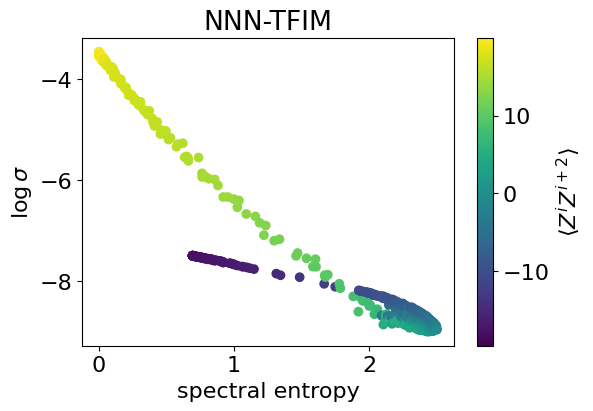

In [ ]:
import seaborn as sns
plt.rcParams['font.size'] = 16
plt.figure(figsize=(6,4),dpi=100)


idx_e = jnp.argsort(spec_entropy_mean.reshape(-1))
c = jnp.mean(corr2,axis=-1).reshape(-1)
m = jnp.mean(jnp.abs(jnp.sum(testset,axis=-1)),axis=-1)
d = jnp.mean(D,axis=-1).reshape(-1)
plt.scatter(spec_entropy_mean.reshape(-1)[idx_e], all_logvar[:,:,idx[0]].reshape(-1)[idx_e],c=c[idx_e], marker='o')
cbar = plt.colorbar()
cbar.set_label(r'$\langle Z^i Z^{i+2} \rangle$')
plt.xlabel(r'spectral entropy')
plt.ylabel(r'$\log\sigma$')
plt.title(r'NNN-TFIM')
plt.show()

### Generalization

In [ ]:
all_J2 = jnp.arange(0.0, 1.05, 0.05)
all_h = jnp.arange(0, 2.05, 0.05)[:25]
all_h_hole = jnp.concatenate([all_h[:9],all_h[15:]],axis=0)


is_test_set = False
N = 20

num_sample_per_params = 10000
dataset = jnp.zeros([jnp.size(all_J2), jnp.size(all_h_hole), num_sample_per_params, N])

key = jax.random.PRNGKey(10+is_test_set*10)

wave_fcts = data_exact['wave_fcts']

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h_hole):
      print('J2: {}, h: {}'.format(J2,h))
      key, subkey = jax.random.split(key)
      jj = jnp.argwhere(all_h==h)[0,0]
      samples = sample_spin_configurations(wave_fcts[i,jj], num_samples=num_sample_per_params, N=N, rng_key=key)
      dataset = dataset.at[i,j].set(samples)


J2: 0.0, h: 0.0
J2: 0.0, h: 0.05
J2: 0.0, h: 0.1
J2: 0.0, h: 0.15000000000000002
J2: 0.0, h: 0.2
J2: 0.0, h: 0.25
J2: 0.0, h: 0.30000000000000004
J2: 0.0, h: 0.35000000000000003
J2: 0.0, h: 0.4
J2: 0.0, h: 0.75
J2: 0.0, h: 0.8
J2: 0.0, h: 0.8500000000000001
J2: 0.0, h: 0.9
J2: 0.0, h: 0.9500000000000001
J2: 0.0, h: 1.0
J2: 0.0, h: 1.05
J2: 0.0, h: 1.1
J2: 0.0, h: 1.1500000000000001
J2: 0.0, h: 1.2000000000000002
J2: 0.05, h: 0.0
J2: 0.05, h: 0.05
J2: 0.05, h: 0.1
J2: 0.05, h: 0.15000000000000002
J2: 0.05, h: 0.2
J2: 0.05, h: 0.25
J2: 0.05, h: 0.30000000000000004
J2: 0.05, h: 0.35000000000000003
J2: 0.05, h: 0.4
J2: 0.05, h: 0.75
J2: 0.05, h: 0.8
J2: 0.05, h: 0.8500000000000001
J2: 0.05, h: 0.9
J2: 0.05, h: 0.9500000000000001
J2: 0.05, h: 1.0
J2: 0.05, h: 1.05
J2: 0.05, h: 1.1
J2: 0.05, h: 1.1500000000000001
J2: 0.05, h: 1.2000000000000002
J2: 0.1, h: 0.0
J2: 0.1, h: 0.05
J2: 0.1, h: 0.1
J2: 0.1, h: 0.15000000000000002
J2: 0.1, h: 0.2
J2: 0.1, h: 0.25
J2: 0.1, h: 0.30000000000000004
J2:

In [ ]:
batches = batch_data_suffled(dataset.reshape(-1,N), batch_size=10000, key=jax.random.PRNGKey(123567))
batches = jax.device_put(batches)
input_init = batches[0]

beta: 30,  gamma_max: 1.0, gamma_min: 0.1
step: 0, loss: -1079.0093723857592, bKL: 11.737114767405577, RC: 39.00943958694667
logvar: [ 0.39890363  0.36595992  0.17306237  0.23137547 -0.21344393]
step: 1, loss: -1094.1207570574334, bKL: 97.50281735964849, RC: 7.0920728754745745
logvar: [-0.15134921 -0.14729003 -0.13412934 -6.23944066 -0.09965606]
step: 2, loss: -1094.2877067290215, bKL: 97.40567825451042, RC: 6.88940792078221
logvar: [-0.15024104 -0.11835949 -0.1061484  -6.22494852 -0.03171231]
step: 3, loss: -1094.3462276495975, bKL: 99.56285733203605, RC: 6.809447185726254
logvar: [-0.10686595 -0.06950253 -0.12092288 -6.4337001  -0.04668628]
step: 4, loss: -1094.4205259986043, bKL: 100.53256070352784, RC: 6.754420505952314
logvar: [-0.11286011 -0.05330146 -0.0493751  -6.5562384  -0.03777583]
step: 5, loss: -1094.4276187827463, bKL: 100.83913925948308, RC: 6.747429955799545
logvar: [-0.094818   -0.06711815 -0.04953516 -6.59430354 -0.04372117]
step: 6, loss: -1094.4756396891432, bKL: 10

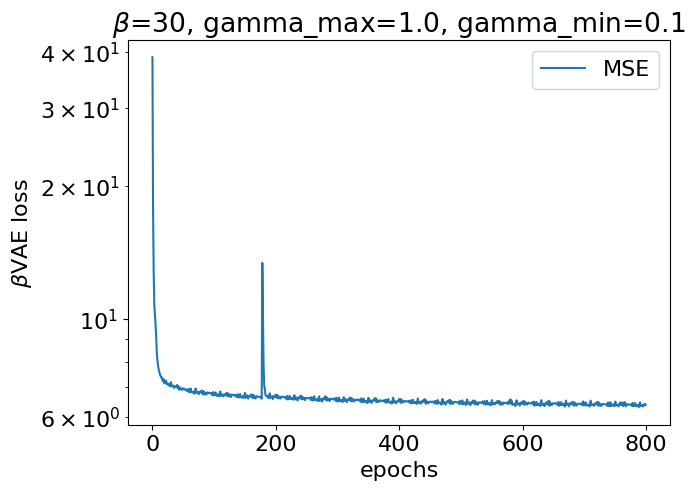

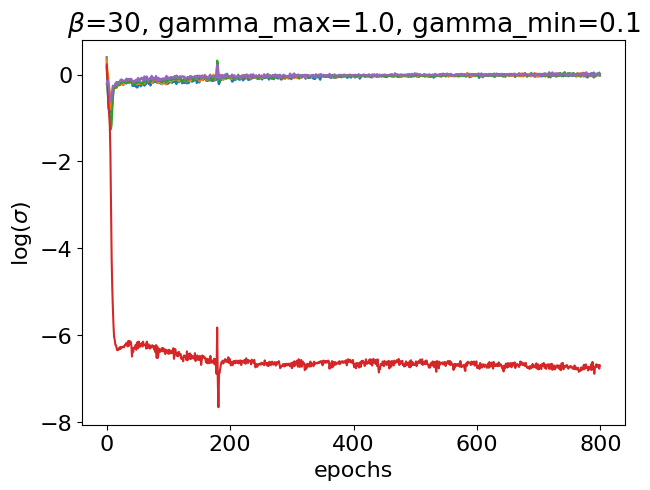

In [ ]:
alpha = 0.1
beta = 50
gamma_min = 0.1
gamma_max = 1.0


for gamma_min in [0.1]:
  for gamma_max in [1.0]:
    for beta in [30]:


      print('beta: {},  gamma_max: {}, gamma_min: {}'.format(beta,gamma_max, gamma_min))

      m = 0

      ### INITIALIZATION ###

      #keys
      input_init = batches[0]
      rng = jax.random.PRNGKey(1234+m)
      key_init = jax.random.PRNGKey(124+m)
      key = jax.random.PRNGKey(12+m)


      #parameters of the VAE
      latent_dim =  5
      enc_lat = Encoder_and_latent(latent_dim=latent_dim)
      params_encoder = enc_lat.init(rng, input_init, key_init)['params']

      N = 20
      hi = nk.hilbert.Spin(s=1/2, N=N)
      decoder = ARNNDense(hilbert=hi, layers= 3, features=4*N)
      #decoder = GRUNet1D(hilbert=hi, layers= 3, features=4*N)
      params_decoder = decoder.init(jax.random.PRNGKey(0), jnp.ones((1, N+latent_dim)))

      params = (params_encoder, params_decoder)


      #Optimizer
      lr = 0.001
      opt = optax.adabelief(learning_rate=lr)
      opt_state = opt.init(params)


      #Containers to store the values of the losses during the training
      history_loss = []
      history_loss_KL = []
      history_loss_RC = []
      history_loss_MI = []
      history_loss_TC = []
      history_loss_DW = []
      history_logvar = []


      num_epochs = 20



      ### TRAINING ###

      for i in range(num_epochs):
        for j, batch in enumerate(batches):

          key = jax.random.split(key)[0]
          tot_num_epochs = 100#num_epochs
          gamma = lin_annealing(i*40+j, 40*tot_num_epochs, gamma_min, gamma_max)

          val, grad = val_grad_fn(params, batch, alpha, beta, gamma, key)
          updates, opt_state = opt.update(grad, opt_state, params)
          params = optax.apply_updates(params, updates)

          if j%10==0:
                history_loss.append(val.tolist())
                KL = KL_loss(params, batch, key).tolist()
                history_loss_KL.append(KL)
                RC = RC_loss(params, batch, key).tolist()
                history_loss_RC.append(RC)


                mean, logvar, z = enc_lat.apply({'params': params[0]}, batch, key)
                history_logvar.append(logvar)


          if i%1==0 and j==0:
                print("step: {}, loss: {}, bKL: {}, RC: {}".format(i,val,KL,RC))
                print("logvar: {}".format(jnp.mean(logvar, axis=0)))







      history_logvar = jnp.array(history_logvar)

      plt.rcParams['font.size'] = 16
      plt.figure(figsize=(7,5),dpi=100)

      plt.semilogy(history_loss_RC,color=sns.color_palette('Paired')[1], label="MSE")
      #plt.semilogy(beta*jnp.array(history_loss_KL),color=sns.color_palette('Paired')[9], label=r'$\beta$KL')

      plt.legend()
      #plt.xlim([-10,500])
      plt.xlabel('epochs')
      plt.ylabel(r'$\beta$VAE loss')
      plt.title(r'$\beta$={}, gamma_max={}, gamma_min={}'.format(beta,gamma_max, gamma_min))
      plt.show()

      plt.rcParams['font.size'] = 16
      plt.figure(figsize=(7,5),dpi=100)

      plt.plot([jnp.mean(history_logvar[i], axis=0) for i in range(len(history_logvar))])
      plt.xlabel('epochs')
      plt.ylabel(r'$\log(\sigma)$')
      plt.title(r'$\beta$={}, gamma_max={}, gamma_min={}'.format(beta,gamma_max, gamma_min))
      plt.show()

      data = {'params': params, 'history_loss': history_loss, 'history_loss_KL': history_loss_KL, 'history_loss_RC': history_loss_RC, 'history_loss_DW': history_loss_DW, 'history_loss_MI': history_loss_MI, 'history_loss_MI': history_loss_MI, 'history_loss_TC': history_loss_TC, 'alpha_beta_gamma':[alpha, beta, gamma], 'history_logvar': history_logvar}
      with open('J1J2N20_hole_data_model_ARconv_beta{}_gammamax{}_ gamma_min{}.pkl'.format(beta,gamma_max, gamma_min), 'wb') as f:
          pickle.dump(data, f)


      #from google.colab import files
      #files.download('J1J2N18_data_model_AR_beta{}_gammamax{}_ gamma_min{}.pkl'.format(beta,gamma_max, gamma_min))


#target (woKL) is around 2, 4.6 is already not bad

In [ ]:
gamma_min = 0.1
gamma_max = 1.0
beta = 30
with open('J1J2N20_hole_data_model_ARconv_beta{}_gammamax{}_ gamma_min{}.pkl'.format(beta,gamma_max, gamma_min), 'rb') as f:
   data = pickle.load(f)

In [ ]:
all_RC = jnp.zeros((len(all_J2),len(all_h)))
key = jax.random.PRNGKey(0)
params = data['params']
#testset = dataset
for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):
    key, _ = jax.random.split(key)
    RC = RC_loss(params, testset[i,j], key).tolist()
    all_RC = all_RC.at[i,j].set(RC)


In [ ]:
all_h

Array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 ], dtype=float64)

In [ ]:
all_h_hole

Array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.75, 0.8 ,
       0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ], dtype=float64)

In [ ]:
all_recon_x = jnp.zeros(jnp.shape(testset))

params = data['params']

params_encoder = params[0]
params_decoder = params[1]

key = jax.random.PRNGKey(4321)
enc_lat = Encoder_and_latent(latent_dim=latent_dim)
get_latent_var = jax.jit(enc_lat.apply)

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):

      #print('J2: {}, h: {}'.format(J2,h))

      d = testset[i,j]
      means, logvar, z  = get_latent_var({'params': params_encoder}, d, key)

      S = get_sample_fast(decoder,params_decoder,z,key)
      all_recon_x = all_recon_x.at[i,j].set(S)


      #all_mean = all_mean.at[i,j].set(mean)
      #all_logvar = all_logvar.at[i,j].set(logvar)


In [ ]:
with open('J1J2N20_hole_all_recon_x_ARconv.pkl', 'wb') as f:
    pickle.dump(all_recon_x, f)

In [ ]:
@jax.jit
def compute_correlation2(x):
  """Computes the correlation of a single configuration."""
  N = x.shape[0]
  shifted_x = jnp.roll(x, -2)  # Shift x by one position to the left
  return jnp.sum(x * shifted_x, axis=-1)  # Element-wise product and sum

compute_correlation2_vmap = jax.vmap(jax.vmap(compute_correlation2))
corr2 = compute_correlation2_vmap(testset)#/jnp.shape(testset)[2]



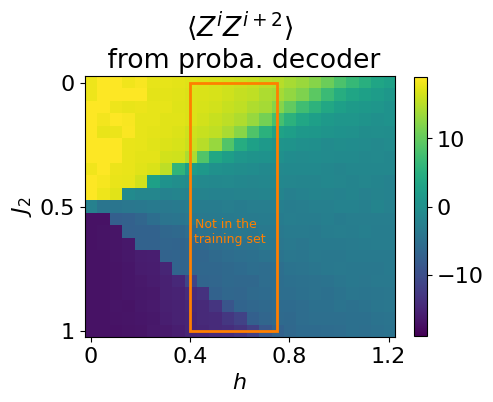

In [ ]:
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(5,5),dpi=100)


plt.imshow(jnp.mean(compute_correlation2_vmap(all_recon_x),axis=-1),vmin=-19,vmax=19)
plt.ylabel(r'$J_2$')
plt.xlabel(r'$h$')
plt.colorbar(shrink=0.675)
plt.title(r'$\langle Z^iZ^{i+2} \rangle $' + '\n from proba. decoder')

y_tick_positions = [0,10,20]  # Positions for the ticks
y_tick_labels = ['0', '0.5', '1']  # Labels for the ticks
plt.yticks(y_tick_positions, y_tick_labels)

x_tick_positions = [0, 8, 16, 24]  # Positions for the ticks
x_tick_labels = ['0', '0.4', '0.8', '1.2']  # Labels for the ticks
plt.xticks(x_tick_positions, x_tick_labels)


rect = patches.Rectangle((8, 0), 7., 20, linewidth=2, edgecolor=sns.color_palette('Paired')[7], facecolor='none')
ax.add_patch(rect)
ax.text(11, 12, 'Not in the \n training set', color=rect.get_edgecolor(), ha='center', va='center', fontsize=9)




plt.show()

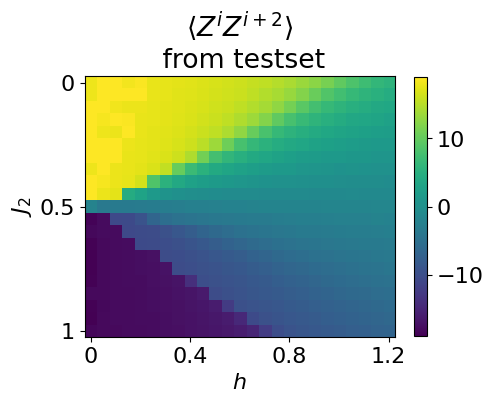

In [ ]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(5,5),dpi=100)


plt.imshow(jnp.mean(corr2, axis=-1),vmin=-19,vmax=19)
plt.ylabel(r'$J_2$')
plt.xlabel(r'$h$')
plt.colorbar(shrink=0.675)
plt.title(r'$\langle Z^iZ^{i+2} \rangle $' + '\n from testset')

y_tick_positions = [0,10,20]  # Positions for the ticks
y_tick_labels = ['0', '0.5', '1']  # Labels for the ticks
plt.yticks(y_tick_positions, y_tick_labels)

x_tick_positions = [0, 8, 16, 24]  # Positions for the ticks
x_tick_labels = ['0', '0.4', '0.8', '1.2']  # Labels for the ticks
plt.xticks(x_tick_positions, x_tick_labels)

plt.show()

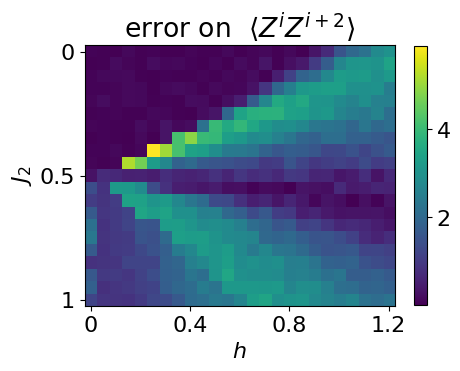

In [ ]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(5,5),dpi=100)

c = jnp.mean(corr2, axis=-1)
plt.imshow(jnp.abs((jnp.mean(compute_correlation2_vmap(all_recon_x),axis=-1)-c)))#,vmin=0,vmax=1)
plt.ylabel(r'$J_2$')
plt.xlabel(r'$h$')
plt.colorbar(shrink=0.675)
plt.title(r'error on  $\langle Z^iZ^{i+2} \rangle $' )

y_tick_positions = [0,10,20]  # Positions for the ticks
y_tick_labels = ['0', '0.5', '1']  # Labels for the ticks
plt.yticks(y_tick_positions, y_tick_labels)

x_tick_positions = [0, 8, 16, 24]  # Positions for the ticks
x_tick_labels = ['0', '0.4', '0.8', '1.2']  # Labels for the ticks
plt.xticks(x_tick_positions, x_tick_labels)

plt.show()

Let push even furter

In [ ]:
jnp.arange(0.0, 1.05, 0.05)[:11]

Array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ],      dtype=float64)

In [ ]:
all_J2_hole = jnp.arange(0.0, 1.05, 0.05)[:11]
all_h = jnp.arange(0, 2.05, 0.05)[:25]
#ll_h_hole = jnp.concatenate([all_h[:9],all_h[15:]],axis=0)


is_test_set = False
N = 20

num_sample_per_params = 10000
dataset = jnp.zeros([jnp.size(all_J2_hole), jnp.size(all_h), num_sample_per_params, N])

key = jax.random.PRNGKey(10+is_test_set*10)

wave_fcts = data_exact['wave_fcts']

for i, J2 in enumerate(all_J2_hole):
  for j, h in enumerate(all_h):
      print('J2: {}, h: {}'.format(J2,h))
      key, subkey = jax.random.split(key)
      ii = jnp.argwhere(all_J2==J2)[0,0]
      samples = sample_spin_configurations(wave_fcts[ii,j], num_samples=num_sample_per_params, N=N, rng_key=key)
      dataset = dataset.at[i,j].set(samples)


J2: 0.0, h: 0.0
J2: 0.0, h: 0.05
J2: 0.0, h: 0.1
J2: 0.0, h: 0.15000000000000002
J2: 0.0, h: 0.2
J2: 0.0, h: 0.25
J2: 0.0, h: 0.30000000000000004
J2: 0.0, h: 0.35000000000000003
J2: 0.0, h: 0.4
J2: 0.0, h: 0.45
J2: 0.0, h: 0.5
J2: 0.0, h: 0.55
J2: 0.0, h: 0.6000000000000001
J2: 0.0, h: 0.65
J2: 0.0, h: 0.7000000000000001
J2: 0.0, h: 0.75
J2: 0.0, h: 0.8
J2: 0.0, h: 0.8500000000000001
J2: 0.0, h: 0.9
J2: 0.0, h: 0.9500000000000001
J2: 0.0, h: 1.0
J2: 0.0, h: 1.05
J2: 0.0, h: 1.1
J2: 0.0, h: 1.1500000000000001
J2: 0.0, h: 1.2000000000000002
J2: 0.05, h: 0.0
J2: 0.05, h: 0.05
J2: 0.05, h: 0.1
J2: 0.05, h: 0.15000000000000002
J2: 0.05, h: 0.2
J2: 0.05, h: 0.25
J2: 0.05, h: 0.30000000000000004
J2: 0.05, h: 0.35000000000000003
J2: 0.05, h: 0.4
J2: 0.05, h: 0.45
J2: 0.05, h: 0.5
J2: 0.05, h: 0.55
J2: 0.05, h: 0.6000000000000001
J2: 0.05, h: 0.65
J2: 0.05, h: 0.7000000000000001
J2: 0.05, h: 0.75
J2: 0.05, h: 0.8
J2: 0.05, h: 0.8500000000000001
J2: 0.05, h: 0.9
J2: 0.05, h: 0.9500000000000001
J

In [ ]:
batches = batch_data_suffled(dataset.reshape(-1,N), batch_size=10000, key=jax.random.PRNGKey(123567))
#for conv
#batches = batch_data_suffled(dataset.reshape(-1,N,1), batch_size=5000, key=jax.random.PRNGKey(123567))
batches = jax.device_put(batches)
input_init = batches[0]

beta: 30,  gamma_max: 1.0, gamma_min: 0.1
step: 0, loss: -1079.0492028677807, bKL: 12.807567357019922, RC: 32.71267305607184
logvar: [ 0.40641741  0.37236702  0.16254799  0.20018049 -0.16070528]
step: 1, loss: -1095.0304722698816, bKL: 101.68123865663472, RC: 6.170323516418502
logvar: [-0.13272812 -0.12091952 -0.10475931 -6.5877981  -0.01542201]
step: 2, loss: -1095.0926537040448, bKL: 100.36824019111478, RC: 6.060483644036743
logvar: [-0.13897779 -0.0342225  -0.08208276 -6.48434132 -0.05416372]
step: 3, loss: -1095.1622497295812, bKL: 99.3306435829089, RC: 6.021868911992657
logvar: [-0.11450544 -0.10685086 -0.07210433 -6.46751087 -0.0571457 ]
step: 4, loss: -1095.2010260502839, bKL: 99.84520650252861, RC: 5.9915093644063475
logvar: [-0.14563648 -0.12641663 -0.06583149 -6.51396861 -0.02255073]
step: 5, loss: -1095.1841873017806, bKL: 97.1360336019296, RC: 5.989727827269245
logvar: [-0.07649856 -0.0816671  -0.0663102  -6.22440481 -0.02066934]
step: 6, loss: -1095.2186884371965, bKL: 97.

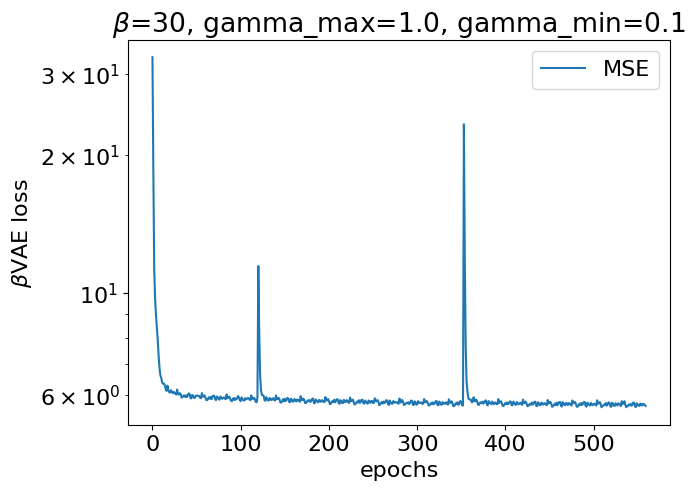

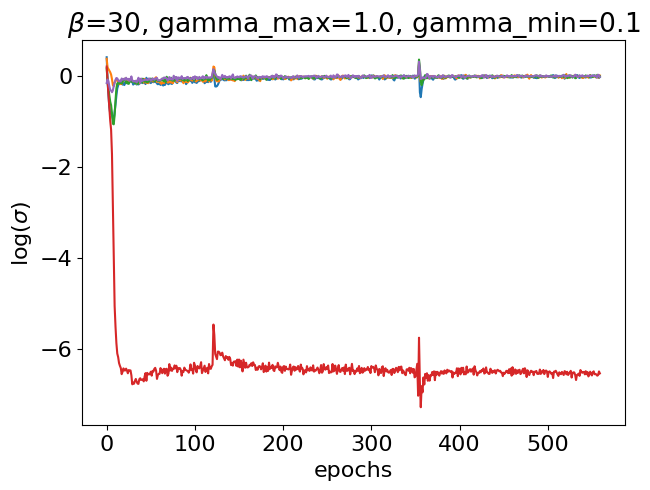

In [ ]:
alpha = 0.1
beta = 50
gamma_min = 0.1
gamma_max = 1.0


for gamma_min in [0.1]:#[0.1,0.2]:
  for gamma_max in [1.0]:#[0.5,0.25,0.75,0.1]:
    for beta in [30]:#[3]:


      print('beta: {},  gamma_max: {}, gamma_min: {}'.format(beta,gamma_max, gamma_min))
      #for m in range(10):

      m = 0

      ### INITIALIZATION ###

      #keys
      input_init = batches[0]
      rng = jax.random.PRNGKey(1234+m)
      key_init = jax.random.PRNGKey(124+m)
      key = jax.random.PRNGKey(12+m)


      #parameters of the VAE
      latent_dim =  5
      enc_lat = Encoder_and_latent(latent_dim=latent_dim)
      params_encoder = enc_lat.init(rng, input_init, key_init)['params']

      N = 20
      hi = nk.hilbert.Spin(s=1/2, N=N)
      decoder = ARNNDense(hilbert=hi, layers= 3, features=4*N)
      #decoder = GRUNet1D(hilbert=hi, layers= 3, features=4*N)
      params_decoder = decoder.init(jax.random.PRNGKey(0), jnp.ones((1, N+latent_dim)))

      params = (params_encoder, params_decoder)


      #Optimizer
      lr = 0.001
      opt = optax.adabelief(learning_rate=lr)
      opt_state = opt.init(params)


      #Containers to store the values of the losses during the training
      history_loss = []
      history_loss_KL = []
      history_loss_RC = []
      history_loss_MI = []
      history_loss_TC = []
      history_loss_DW = []
      history_logvar = []


      num_epochs = 20



      ### TRAINING ###

      for i in range(num_epochs):
        for j, batch in enumerate(batches):

          key = jax.random.split(key)[0]
          tot_num_epochs = 100#num_epochs
          gamma = lin_annealing(i*40+j, 40*tot_num_epochs, gamma_min, gamma_max)

          val, grad = val_grad_fn(params, batch, alpha, beta, gamma, key)
          updates, opt_state = opt.update(grad, opt_state, params)
          params = optax.apply_updates(params, updates)

          if j%10==0:
                history_loss.append(val.tolist())
                KL = KL_loss(params, batch, key).tolist()
                history_loss_KL.append(KL)
                RC = RC_loss(params, batch, key).tolist()
                history_loss_RC.append(RC)

                MI, TC, DW = all_KL_terms(params, batch, key)
                history_loss_MI.append(MI.tolist())
                history_loss_TC.append(TC.tolist())
                history_loss_DW.append(DW.tolist())

                mean, logvar, z = enc_lat.apply({'params': params[0]}, batch, key)
                history_logvar.append(logvar)


          if i%1==0 and j==0:
                print("step: {}, loss: {}, bKL: {}, RC: {}".format(i,val,KL,RC))
                print("logvar: {}".format(jnp.mean(logvar, axis=0)))







      history_logvar = jnp.array(history_logvar)

      import seaborn as sns
      plt.rcParams['font.size'] = 16
      plt.figure(figsize=(7,5),dpi=100)

      plt.semilogy(history_loss_RC,color=sns.color_palette('Paired')[1], label="MSE")
      #plt.semilogy(beta*jnp.array(history_loss_KL),color=sns.color_palette('Paired')[9], label=r'$\beta$KL')

      plt.legend()
      #plt.xlim([-10,500])
      plt.xlabel('epochs')
      plt.ylabel(r'$\beta$VAE loss')
      plt.title(r'$\beta$={}, gamma_max={}, gamma_min={}'.format(beta,gamma_max, gamma_min))
      plt.show()

      plt.rcParams['font.size'] = 16
      plt.figure(figsize=(7,5),dpi=100)

      plt.plot([jnp.mean(history_logvar[i], axis=0) for i in range(len(history_logvar))])
      plt.xlabel('epochs')
      plt.ylabel(r'$\log(\sigma)$')
      plt.title(r'$\beta$={}, gamma_max={}, gamma_min={}'.format(beta,gamma_max, gamma_min))
      plt.show()

      data = {'params': params, 'history_loss': history_loss, 'history_loss_KL': history_loss_KL, 'history_loss_RC': history_loss_RC, 'history_loss_DW': history_loss_DW, 'history_loss_MI': history_loss_MI, 'history_loss_MI': history_loss_MI, 'history_loss_TC': history_loss_TC, 'alpha_beta_gamma':[alpha, beta, gamma], 'history_logvar': history_logvar}
      with open('J1J2N20_hole2_data_model_ARconv_beta{}_gammamax{}_ gamma_min{}.pkl'.format(beta,gamma_max, gamma_min), 'wb') as f:
          pickle.dump(data, f)


      #from google.colab import files
      #files.download('J1J2N18_data_model_AR_beta{}_gammamax{}_ gamma_min{}.pkl'.format(beta,gamma_max, gamma_min))


#target (woKL) is around 2, 4.6 is already not bad

In [ ]:
all_RC = jnp.zeros((len(all_J2),len(all_h)))
key = jax.random.PRNGKey(0)
#params = data['params']
#testset = dataset
for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):
    key, _ = jax.random.split(key)
    RC = RC_loss(params, testset[i,j], key).tolist()
    all_RC = all_RC.at[i,j].set(RC)


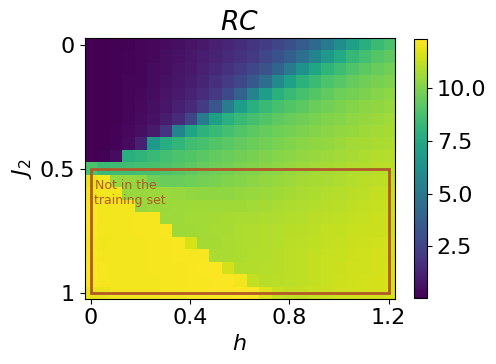

In [ ]:
import matplotlib.patches as patches
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(5,5),dpi=100)

im = ax.imshow(all_RC)
ax.set_ylabel(r'$J_2$')
ax.set_xlabel(r'$h$')
ax.set_title(r'$RC$')
plt.colorbar(im, shrink=0.675)#, label=r'$\langle Z^i \, Z^{i+2} \rangle$')

y_tick_positions = [0,10,20]  # Positions for the ticks
y_tick_labels = ['0', '0.5', '1']  # Labels for the ticks
plt.yticks(y_tick_positions, y_tick_labels)

x_tick_positions = [0, 8, 16, 24]  # Positions for the ticks
x_tick_labels = ['0', '0.4', '0.8', '1.2']  # Labels for the ticks
plt.xticks(x_tick_positions, x_tick_labels)

rect = patches.Rectangle((0, 10), 24., 10, linewidth=2, edgecolor=sns.color_palette('Paired')[-1], facecolor='none')
ax.add_patch(rect)
ax.text(3,12, 'Not in the \n training set', color=rect.get_edgecolor(), ha='center', va='center', fontsize=9)


plt.show()

In [ ]:
all_recon_x = jnp.zeros(jnp.shape(testset[:,:,:1000,:]))

params_encoder = params[0]
params_decoder = params[1]

key = jax.random.PRNGKey(4321)
enc_lat = Encoder_and_latent(latent_dim=latent_dim)
get_latent_var = jax.jit(enc_lat.apply)

for i, J2 in enumerate(all_J2):
  for j, h in enumerate(all_h):

      #print('J2: {}, h: {}'.format(J2,h))

      d = testset[i,j,:1000]
      means, logvar, z  = get_latent_var({'params': params_encoder}, d, key)

      S = get_sample_fast(decoder,params_decoder,z,key)
      all_recon_x = all_recon_x.at[i,j].set(S)


      #all_mean = all_mean.at[i,j].set(mean)
      #all_logvar = all_logvar.at[i,j].set(logvar)


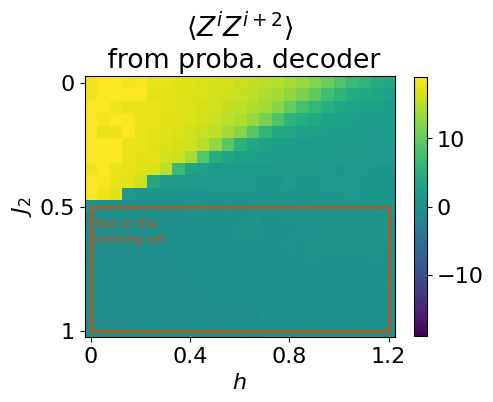

In [ ]:
import seaborn as sns
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(5,5),dpi=100)


plt.imshow(jnp.mean(compute_correlation2_vmap(all_recon_x),axis=-1),vmin=-19,vmax=19)
plt.ylabel(r'$J_2$')
plt.xlabel(r'$h$')
plt.colorbar(shrink=0.675)
plt.title(r'$\langle Z^iZ^{i+2} \rangle $' + '\n from proba. decoder')

y_tick_positions = [0,10,20]  # Positions for the ticks
y_tick_labels = ['0', '0.5', '1']  # Labels for the ticks
plt.yticks(y_tick_positions, y_tick_labels)

x_tick_positions = [0, 8, 16, 24]  # Positions for the ticks
x_tick_labels = ['0', '0.4', '0.8', '1.2']  # Labels for the ticks
plt.xticks(x_tick_positions, x_tick_labels)


rect = patches.Rectangle((0, 10), 24., 10, linewidth=2, edgecolor=sns.color_palette('Paired')[-1], facecolor='none')
ax.add_patch(rect)
ax.text(3,12, 'Not in the \n training set', color=rect.get_edgecolor(), ha='center', va='center', fontsize=9)




plt.show()